In [1]:
# 外部ライブラリのインポート_
import pandas as pd
import numpy as np

# 自作パッケージのインポート
# from libs_QSM.Plot_gdf import plot_gdf
from libs_QSM.Prepare_data import Prepare_data
from libs_QSM.Estimate_params import Estimate_params
from libs_QSM.Solve_equilibrium import Solve_equilibrium

In [2]:
# index
jcode = pd.read_csv('data/2020/jcode.csv', dtype={'jcode':str})['jcode'].to_list()
# params
df_param = pd.read_csv('data/2020/param.csv')
param = {}
param['alpha'] = df_param['alpha'].to_list()[0]
param['gamma'] = df_param['gamma'].to_list()[0]
param['psi'] = df_param['psi'].to_list()[0]
param['beta_cns'] = df_param['beta_cns'].to_list()[0]
param['beta_flr'] = df_param['beta_flr'].to_list()[0]
param['beta_chd'] = df_param['beta_chd'].to_list()[0]
# previous exogenous variables
df_scaler = pd.read_csv('data/2000/scaler.csv')
df_p_i = pd.read_csv('data/2000/p_i.csv', dtype={'jcode':str})
df_K_i = pd.read_csv('sources/K_i.csv', dtype={'jcode':str})
df_tau_ij = pd.read_csv('data/2000/tau_ij.csv', dtype={0:str}, index_col=0)
df_t_ij = pd.read_csv('data/2000/t_ij.csv', dtype={0:str}, index_col=0)
prev_exog = {}
prev_exog['T'] = df_scaler['T'].to_list()[0]
prev_exog['N'] = df_scaler['N'].to_list()[0]
prev_exog['L'] = df_scaler['L'].to_list()[0]
prev_exog['p_i'] = df_p_i['p_i'].to_numpy()
prev_exog['K_i'] = df_K_i['K_i'].to_numpy()
prev_exog['tau_ij'] = df_tau_ij.to_numpy()
prev_exog['t_ij'] = df_t_ij.to_numpy()
# previous reference endogenous variables
df_w_j = pd.read_csv('data/2000/w_j.csv', dtype={'jcode':str})
df_q_i = pd.read_csv('data/2000/q_i.csv', dtype={'jcode':str})
df_Q_j = pd.read_csv('data/2000/Q_j.csv', dtype={'jcode':str})
df_Pi_ij = pd.read_csv('data/2000/Pi_ij.csv', dtype={0:str}, index_col=0)
df_n_ij = pd.read_csv('data/2000/n_ij.csv', dtype={0:str}, index_col=0)
df_theta_i = pd.read_csv('data/2000/theta_i.csv', dtype={'jcode':str})
prev_ref = {}
prev_ref['w_j'] = df_w_j['w_j'].to_numpy()
prev_ref['q_i'] = df_q_i['q_i'].to_numpy()
prev_ref['Q_j'] = df_Q_j['Q_j'].to_numpy()
prev_ref['Pi_ij'] = df_Pi_ij.to_numpy()
prev_ref['n_ij'] = df_n_ij.to_numpy()
prev_exog['theta_i'] = df_theta_i['theta_i'].to_numpy()
# nest exogenous variables
df_scaler = pd.read_csv('data/2020/scaler.csv')
df_p_i = pd.read_csv('data/2020/p_i.csv', dtype={'jcode':str})
df_K_i = pd.read_csv('sources/K_i.csv', dtype={'jcode':str})
df_tau_ij = pd.read_csv('data/2020/tau_ij.csv', dtype={0:str}, index_col=0)
df_t_ij = pd.read_csv('data/2020/t_ij.csv', dtype={0:str},index_col=0)
next_exog = {}
next_exog['T'] = df_scaler['T'].to_list()[0]
next_exog['N'] = df_scaler['N'].to_list()[0]
next_exog['L'] = df_scaler['L'].to_list()[0]
next_exog['p_i'] = df_p_i['p_i'].to_numpy()
next_exog['K_i'] = df_K_i['K_i'].to_numpy()
next_exog['tau_ij'] = df_tau_ij.to_numpy()
next_exog['t_ij'] = df_t_ij.to_numpy()
# previous reference endogenous variables
df_w_j = pd.read_csv('data/2020/w_j.csv', dtype={'jcode':str})
df_q_i = pd.read_csv('data/2020/q_i.csv', dtype={'jcode':str})
df_Q_j = pd.read_csv('data/2020/Q_j.csv', dtype={'jcode':str})
df_Pi_ij = pd.read_csv('data/2020/Pi_ij.csv', dtype={0:str}, index_col=0)
df_n_ij = pd.read_csv('data/2020/n_ij.csv', dtype={0:str}, index_col=0)
df_theta_i = pd.read_csv('data/2020/theta_i.csv', dtype={'jcode':str})
next_ref = {}
next_ref['w_j'] = df_w_j['w_j'].to_numpy()
next_ref['q_i'] = df_q_i['q_i'].to_numpy()
next_ref['Q_j'] = df_Q_j['Q_j'].to_numpy()
next_ref['Pi_ij'] = df_Pi_ij.to_numpy()
next_ref['n_ij'] = df_n_ij.to_numpy()
next_exog['theta_i'] = df_theta_i['theta_i'].to_numpy()

In [3]:
f_1 = Prepare_data(jcode) #111
f_1.set_param(param)
f_1.set_exog_prev(prev_exog)
f_1.set_exog_next(next_exog)

f_1.set_ref_prev(prev_ref)
f_1.set_ref_next(next_ref)
# restore the w_j
# f_1.ref_prev['w_j'] = pd.read_csv('/Users/nagampere/File/horkew/analysis/master_thesis/data/2010/w_j.csv')['w_j'].to_numpy()
# f_1.ref_next['w_j'] = pd.read_csv('/Users/nagampere/File/horkew/analysis/master_thesis/data/2020/w_j.csv')['w_j'].to_numpy()
f_1.calc_dep_next()
f_1.calc_dep_prev()

alpha array has been stored.
gamma array has been stored.
psi array has been stored.
beta_cns array has been stored.
beta_flr array has been stored.
beta_chd array has been stored.
T array has been correctly stored.
N array has been correctly stored.
L array has been correctly stored.
p_i array has been stored.
K_i array has been stored.
theta_i array has been stored.
tau_ij array has been stored.
t_ij array has been stored.
T array has been correctly stored.
N array has been correctly stored.
L array has been correctly stored.
p_i array has been stored.
K_i array has been stored.
theta_i array has been stored.
tau_ij array has been stored.
t_ij array has been stored.
q_i array has been stored.
w_j array has been stored.
Q_j array has been stored.
Pi_ij array has been stored.
n_ij array has been stored.
q_i array has been stored.
w_j array has been stored.
Q_j array has been stored.
Pi_ij array has been stored.
n_ij array has been stored.
                            OLS Estimation Summ

In [4]:
f_2 = Estimate_params(f_1)
# f_2.run_eps_prev('OLS')
# f_2.run_eps_next('OLS')
# f_2.merge_eps()
# f_2.run_lmd_dlt()
# f_2.run_eta_rho()
f_2.param['gam*eps'] = 10.3
f_2.param['epsilon'] = 27.5
f_2.param['lambda'] = 0.07
f_2.param['delta'] = 0.35
f_2.param['eta'] = 0.15
f_2.param['rho'] = 0.75

f_2.recover_fundamentals_next()
f_2.recover_fundamentals_prev()

### Check the estimation result ###
A_j


0         1        2         3         4         5         6    \
0  1.205046  1.439029  0.93325  1.613515  1.648137  1.571186  1.444123   

        7         8         9    ...       101       102       103       104  \
0  1.305966  1.653588  1.290575  ...  1.538483  1.765365  1.900623  1.782505   

      105       106       107       108       109       110  
0  1.5882  1.432685  1.303325  1.389291  1.610197  1.225405  

[1 rows x 111 columns]

B_i


0         1         2         3         4         5         6    \
0  1.02783  0.990081  0.921301  1.222587  1.198177  1.153469  1.176419   

        7         8         9    ...       101       102       103       104  \
0  1.101299  1.136566  1.144769  ...  1.183698  1.144082  1.127909  1.131142   

       105       106       107       108       109       110  
0  1.16117  1.126018  1.206796  1.145743  1.078431  1.115529  

[1 rows x 111 columns]

XE_ij


0         1         2           3          4         5         6    \
0    1.000000  0.004096  0.097458    0.000000   0.000000  0.000000  0.000000   
1    0.071614  0.053691  0.123016    0.000000   0.000000  0.000000  0.000000   
2    0.014387  0.001804  0.052630    0.000000   0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  105.586237   3.648682  2.785864  0.631223   
4    0.000000  0.000000  0.000000   12.349451  21.993105  5.889373  1.102997   
..        ...       ...       ...         ...        ...       ...       ...   
106  0.000000  0.000000  0.000000    0.000000   0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000    0.000000   0.000000  0.000000  0.000000   
108  0.000000  0.000000  0.000000    0.000000   0.000000  0.000000  0.000000   
109  0.000000  0.000000  0.000000    0.000000   0.000000  0.000000  0.000000   
110  0.000000  0.000000  0.000000    0.000000   0.000000  0.000000  0.000000   

          7         8         9    ...       101       102       103  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3    0.568414  0.487438  6.263877  ...  0.000000  0.000000  0.000000   
4    1.395862  1.883819  1.665753  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000  ...  0.560641  0.074314  0.167429   
108  0.000000  0.000000  0.000000  ...  0.152719  0.042879  0.048948   
109  0.000000  0.000000  0.000000  ...  0.043777  0.000000  0.012164   
110  0.000000  0.000000  0.000000  ...  0.077058  0.009811  0.022491   

          104       105        106         107        108       109        110  
0    0.000000  0.000000   0.000000    0.000000   0.000000  0.000000   0.000000  
1    0.000000  0.000000   0.000000    0.000000   0.000000  0.000000   0.000000  
2    0.000000  0.000000   0.000000    0.000000   0.000000  0.000000   0.000000  
3    0.000000  0.000000   0.000000    0.000000   0.000000  0.000000   0.000000  
4    0.000000  0.000000   0.000000    0.000000   0.000000  0.000000   0.000000  
..        ...       ...        ...         ...        ...       ...        ...  
106  0.222688  2.598210  10.267613    0.638905   0.401529  0.250740   0.358415  
107  0.043349  0.660805   0.137328  115.068489   3.064199  0.924070   6.914984  
108  0.062193  1.353695   0.168121    4.152140  16.708046  0.559826   4.194733  
109  0.007881  0.209656   0.095981    1.111523   0.579162  1.877111   1.126658  
110  0.000000  0.203095   0.048019    2.771651   1.361698  0.544404  10.223275  

[111 rows x 111 columns]

Pi_est_ij


0         1         2         3         4         5         6    \
0    0.006339  0.000110  0.000242  0.000000  0.000000  0.000000  0.000000   
1    0.000191  0.000861  0.000168  0.000000  0.000000  0.000000  0.000000   
2    0.000319  0.000223  0.000557  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.009228  0.001049  0.000471  0.000045   
4    0.000000  0.000000  0.000000  0.001148  0.007422  0.001266  0.000088   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
108  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
109  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
110  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9    ...       101       102       103  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3    0.000052  0.000147  0.000360  ...  0.000000  0.000000  0.000000   
4    0.000147  0.000656  0.000114  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000  ...  0.000097  0.000064  0.000195   
108  0.000000  0.000000  0.000000  ...  0.000025  0.000041  0.000048   
109  0.000000  0.000000  0.000000  ...  0.000015  0.000000  0.000025   
110  0.000000  0.000000  0.000000  ...  0.000019  0.000013  0.000035   

          104       105       106       107       108       109       110  
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
106  0.000222  0.001183  0.003189  0.000062  0.000056  0.000098  0.000026  
107  0.000037  0.000216  0.000031  0.014062  0.000457  0.000325  0.000591  
108  0.000042  0.000432  0.000030  0.000353  0.002827  0.000201  0.000337  
109  0.000013  0.000147  0.000045  0.000195  0.000189  0.001680  0.000212  
110  0.000000  0.000091  0.000014  0.000461  0.000324  0.000327  0.001387  

[111 rows x 111 columns]

ΔPi_est_ij (%)


/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Estimate_params.py:373: RuntimeWarning: invalid value encountered in divide
  display(pd.DataFrame((Pi_est_ij-Pi_ij)/Pi_ij*100))


0         1         2         3         4         5         6    \
0    0.000004  0.000004  0.000004       NaN       NaN       NaN       NaN   
1    0.000004  0.000004  0.000004       NaN       NaN       NaN       NaN   
2    0.000004  0.000004  0.000004       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN  0.000004  0.000004  0.000004  0.000004   
4         NaN       NaN       NaN  0.000004  0.000004  0.000004  0.000004   
..        ...       ...       ...       ...       ...       ...       ...   
106       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
107       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
108       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
109       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
110       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          7         8         9    ...       101       102       103  \
0         NaN       NaN       NaN  ...       NaN       NaN       NaN   
1         NaN       NaN       NaN  ...       NaN       NaN       NaN   
2         NaN       NaN       NaN  ...       NaN       NaN       NaN   
3    0.000004  0.000004  0.000004  ...       NaN       NaN       NaN   
4    0.000004  0.000004  0.000004  ...       NaN       NaN       NaN   
..        ...       ...       ...  ...       ...       ...       ...   
106       NaN       NaN       NaN  ...       NaN       NaN       NaN   
107       NaN       NaN       NaN  ...  0.000003  0.000003  0.000003   
108       NaN       NaN       NaN  ...  0.000003  0.000003  0.000003   
109       NaN       NaN       NaN  ...  0.000004       NaN  0.000004   
110       NaN       NaN       NaN  ...  0.000004  0.000004  0.000004   

          104       105       106       107       108       109       110  
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
..        ...       ...       ...       ...       ...       ...       ...  
106  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  
107  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  
108  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  0.000003  
109  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  
110       NaN  0.000004  0.000004  0.000004  0.000004  0.000004  0.000004  

[111 rows x 111 columns]

ΣPi_est_ij
0.9999999999999998
###################################
### Check the estimation result ###
A_j


0         1         2         3         4         5        6    \
0  1.452445  1.660301  1.356025  1.787155  1.997328  2.129691  1.99437   

        7         8         9    ...       101      102       103       104  \
0  1.791044  1.870898  1.666001  ...  1.738661  2.02828  2.427866  2.291492   

        105       106       107       108       109       110  
0  2.015497  1.973213  1.803719  1.790883  1.965559  1.701416  

[1 rows x 111 columns]

B_i


0         1         2         3         4         5         6    \
0  1.000094  0.844252  0.843001  1.092446  1.075927  1.055361  1.011887   

        7         8         9    ...       101       102       103       104  \
0  1.015146  1.011154  1.048588  ...  1.084425  1.063579  1.032629  1.081595   

        105       106       107       108       109       110  
0  1.109994  1.072085  1.123738  1.090728  1.033979  1.049161  

[1 rows x 111 columns]

XE_ij


0         1         2         3         4         5         6    \
0    1.000000  0.000836  0.001749  0.000000  0.000000  0.000000  0.000000   
1    0.004491  0.004592  0.000423  0.000000  0.000000  0.000000  0.000000   
2    0.004886  0.000450  0.003790  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  9.086092  0.387990  0.165997  0.016140   
4    0.000000  0.000000  0.000000  1.080230  4.222535  0.409621  0.041002   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
108  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
109  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
110  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9    ...       101       102       103  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3    0.025629  0.023342  0.317666  ...  0.000000  0.000000  0.000000   
4    0.065173  0.108518  0.104972  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  ...  0.039974  0.000000  0.000000   
107  0.000000  0.000000  0.000000  ...  0.386477  0.035976  0.028218   
108  0.000000  0.000000  0.000000  ...  0.095964  0.018868  0.010195   
109  0.000000  0.000000  0.000000  ...  0.042917  0.003109  0.003510   
110  0.000000  0.000000  0.000000  ...  0.066885  0.005212  0.005265   

          104       105       106        107       108       109       110  
0    0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...        ...       ...       ...       ...  
106  0.100931  0.834036  2.179868   0.156895  0.097934  0.053775  0.028459  
107  0.010976  0.179397  0.033362  17.808274  0.607934  0.142517  0.485089  
108  0.024659  0.485465  0.036163   0.688890  4.602372  0.121788  0.323222  
109  0.005441  0.083729  0.019542   0.215370  0.179024  0.591998  0.099897  
110  0.003565  0.067307  0.008950   0.541696  0.364291  0.121756  1.118106  

[111 rows x 111 columns]

Pi_est_ij


0         1         2         3         4         5         6    \
0    0.006502  0.000033  0.000043  0.000000  0.000000  0.000000  0.000000   
1    0.000108  0.000921  0.000050  0.000000  0.000000  0.000000  0.000000   
2    0.000120  0.000088  0.000385  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.010801  0.001144  0.000480  0.000045   
4    0.000000  0.000000  0.000000  0.001194  0.009295  0.001422  0.000097   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
108  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
109  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
110  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9    ...       101       102       103  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3    0.000068  0.000097  0.000304  ...  0.000000  0.000000  0.000000   
4    0.000186  0.000503  0.000105  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  ...  0.000014  0.000000  0.000000   
107  0.000000  0.000000  0.000000  ...  0.000157  0.000081  0.000180   
108  0.000000  0.000000  0.000000  ...  0.000034  0.000042  0.000050   
109  0.000000  0.000000  0.000000  ...  0.000022  0.000012  0.000026   
110  0.000000  0.000000  0.000000  ...  0.000033  0.000016  0.000039   

          104       105       106       107       108       109       110  
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
106  0.000303  0.001451  0.004310  0.000074  0.000072  0.000100  0.000025  
107  0.000037  0.000268  0.000044  0.017453  0.000556  0.000279  0.000605  
108  0.000059  0.000633  0.000048  0.000442  0.004316  0.000220  0.000340  
109  0.000020  0.000186  0.000053  0.000219  0.000249  0.002078  0.000191  
110  0.000015  0.000125  0.000019  0.000590  0.000483  0.000371  0.001997  

[111 rows x 111 columns]

ΔPi_est_ij (%)


/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Estimate_params.py:373: RuntimeWarning: invalid value encountered in divide
  display(pd.DataFrame((Pi_est_ij-Pi_ij)/Pi_ij*100))


0         1         2         3         4         5         6    \
0   -0.000003 -0.000003 -0.000003       NaN       NaN       NaN       NaN   
1   -0.000003 -0.000003 -0.000003       NaN       NaN       NaN       NaN   
2   -0.000003 -0.000003 -0.000003       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN -0.000003 -0.000003 -0.000003 -0.000003   
4         NaN       NaN       NaN -0.000003 -0.000003 -0.000003 -0.000003   
..        ...       ...       ...       ...       ...       ...       ...   
106       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
107       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
108       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
109       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
110       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          7         8         9    ...       101       102       103  \
0         NaN       NaN       NaN  ...       NaN       NaN       NaN   
1         NaN       NaN       NaN  ...       NaN       NaN       NaN   
2         NaN       NaN       NaN  ...       NaN       NaN       NaN   
3   -0.000003 -0.000003 -0.000003  ...       NaN       NaN       NaN   
4   -0.000003 -0.000003 -0.000003  ...       NaN       NaN       NaN   
..        ...       ...       ...  ...       ...       ...       ...   
106       NaN       NaN       NaN  ... -0.000003       NaN       NaN   
107       NaN       NaN       NaN  ... -0.000003 -0.000003 -0.000003   
108       NaN       NaN       NaN  ... -0.000003 -0.000003 -0.000003   
109       NaN       NaN       NaN  ... -0.000003 -0.000003 -0.000003   
110       NaN       NaN       NaN  ... -0.000003 -0.000003 -0.000003   

          104       105       106       107       108       109       110  
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
..        ...       ...       ...       ...       ...       ...       ...  
106 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003  
107 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003  
108 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003  
109 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003  
110 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003  

[111 rows x 111 columns]

ΣPi_est_ij
1.0
###################################


In [5]:
f_3 = Solve_equilibrium(f_2)
# f_3.check_replication_next('root', 'hybr', 10**4) # 10**5で15分, 10*6で1時間半, 10*7で3時間
f_3.check_replication_prev('root', 'hybr', 10**4) # 10**5で15分, 10*6で1時間半, 10*7で3時間

### Check the result of equilibrium ###
 message: The solution converged.
 success: True
  status: 1
     fun: [-5.586e-13 -2.620e-14 ... -6.939e-18  1.128e-17]
       x: [ 9.707e-01  1.239e+00 ...  3.817e+04  4.248e+04]
  method: hybr
    nfev: 336
    fjac: [[-9.962e-01 -1.944e-02 ... -8.583e-06 -9.551e-06]
           [ 2.226e-02 -9.986e-01 ... -1.018e-06 -1.133e-06]
           ...
           [-1.333e-05 -1.014e-06 ... -7.697e-01  5.860e-01]
           [ 2.163e-04  1.646e-05 ... -8.275e-02 -4.678e-02]]
       r: [-5.675e+01 -1.184e+00 ... -4.551e-08 -2.996e-09]
     qtf: [ 2.506e-11  1.743e-11 ... -2.131e-16  2.532e-15]
w_j: 賃金率


0         1         2         3         4         5      6       7    \
0  0.970733  1.239167  1.154167  0.957567  1.078267  1.086267  1.096  1.0947   

        8         9    ...    101       102       103       104     105  \
0  1.128533  0.938433  ...  0.938  1.165433  1.275733  1.203967  1.0896   

        106       107     108     109       110  
0  1.112867  1.003167  1.0187  1.1229  1.047533  

[1 rows x 111 columns]

q_i: 居住地地価


0         1         2         3         4         5         6    \
0  0.310666  0.289332  0.211667  0.688667  0.767333  0.643333  0.702667   

     7      8         9    ...    101    102    103    104    105    106  \
0  0.533  0.819  0.636667  ...  0.895  0.949  0.872  0.835  0.803  0.783   

        107       108    109    110  
0  0.762667  0.783333  0.696  0.728  

[1 rows x 111 columns]

N_R_i: 居住人口


0             1            2              3              4    \
0  61480.857044  10079.975977  5547.986014  135080.998966  136523.002792   

             5             6             7             8             9    ...  \
0  138377.981639  70516.003255  66228.001237  22733.989026  57215.995119  ...   

            101           102           103           104            105  \
0  53704.012045  53450.996176  32912.031579  52565.991174  148212.990617   

            106            107           108           109           110  
0  76173.002018  213835.986618  79285.025989  38172.000478  42476.994488  

[1 rows x 111 columns]

#######################################
### Calculate the endogenous variables ###
π_ij: 通勤割合


0         1         2         3         4         5         6    \
0    0.006502  0.000033  0.000043  0.000000  0.000000  0.000000  0.000000   
1    0.000108  0.000921  0.000050  0.000000  0.000000  0.000000  0.000000   
2    0.000120  0.000088  0.000385  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.010801  0.001144  0.000480  0.000045   
4    0.000000  0.000000  0.000000  0.001194  0.009295  0.001422  0.000097   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
108  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
109  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
110  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9    ...       101       102       103  \
0    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3    0.000068  0.000097  0.000304  ...  0.000000  0.000000  0.000000   
4    0.000186  0.000503  0.000105  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  ...  0.000014  0.000000  0.000000   
107  0.000000  0.000000  0.000000  ...  0.000157  0.000081  0.000180   
108  0.000000  0.000000  0.000000  ...  0.000034  0.000042  0.000050   
109  0.000000  0.000000  0.000000  ...  0.000022  0.000012  0.000026   
110  0.000000  0.000000  0.000000  ...  0.000033  0.000016  0.000039   

          104       105       106       107       108       109       110  
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
106  0.000303  0.001451  0.004310  0.000074  0.000072  0.000100  0.000025  
107  0.000037  0.000268  0.000044  0.017453  0.000556  0.000279  0.000605  
108  0.000059  0.000633  0.000048  0.000442  0.004316  0.000220  0.000340  
109  0.000020  0.000186  0.000053  0.000219  0.000249  0.002078  0.000191  
110  0.000015  0.000125  0.000019  0.000590  0.000483  0.000371  0.001997  

[111 rows x 111 columns]

ΔPi_est_ij (%)


/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium.py:320: RuntimeWarning: invalid value encountered in divide
  display(pd.DataFrame((Pi_ij-self.given_ref['Pi_ij'])/self.given_ref['Pi_ij']*100))


0         1         2             3             4         5    \
0   -0.000251 -0.000311 -0.000301           NaN           NaN       NaN   
1   -0.000150 -0.000205 -0.000196           NaN           NaN       NaN   
2   -0.000172 -0.000229 -0.000220           NaN           NaN       NaN   
3         NaN       NaN       NaN -6.263213e-07  3.761308e-07  0.000003   
4         NaN       NaN       NaN -2.357292e-06 -1.401582e-06  0.000001   
..        ...       ...       ...           ...           ...       ...   
106       NaN       NaN       NaN           NaN           NaN       NaN   
107       NaN       NaN       NaN           NaN           NaN       NaN   
108       NaN       NaN       NaN           NaN           NaN       NaN   
109       NaN       NaN       NaN           NaN           NaN       NaN   
110       NaN       NaN       NaN           NaN           NaN       NaN   

              6             7             8         9    ...       101  \
0             NaN           NaN           NaN       NaN  ...       NaN   
1             NaN           NaN           NaN       NaN  ...       NaN   
2             NaN           NaN           NaN       NaN  ...       NaN   
3    1.860622e-06  2.336386e-06  2.310318e-07 -0.000006  ...       NaN   
4    4.682561e-08  5.092603e-07 -1.556850e-06 -0.000007  ...       NaN   
..            ...           ...           ...       ...  ...       ...   
106           NaN           NaN           NaN       NaN  ... -0.000003   
107           NaN           NaN           NaN       NaN  ... -0.000003   
108           NaN           NaN           NaN       NaN  ... -0.000001   
109           NaN           NaN           NaN       NaN  ... -0.000002   
110           NaN           NaN           NaN       NaN  ... -0.000002   

          102           103       104       105           106       107  \
0         NaN           NaN       NaN       NaN           NaN       NaN   
1         NaN           NaN       NaN       NaN           NaN       NaN   
2         NaN           NaN       NaN       NaN           NaN       NaN   
3         NaN           NaN       NaN       NaN           NaN       NaN   
4         NaN           NaN       NaN       NaN           NaN       NaN   
..        ...           ...       ...       ...           ...       ...   
106       NaN           NaN -0.000004 -0.000003 -2.428194e-06 -0.000003   
107 -0.000004 -1.275414e-06 -0.000004 -0.000003 -2.239825e-06 -0.000003   
108 -0.000002  2.851619e-08 -0.000002 -0.000002 -9.835440e-07 -0.000002   
109 -0.000003 -2.449017e-07 -0.000002 -0.000002 -1.234597e-06 -0.000002   
110 -0.000003 -1.839717e-07 -0.000002 -0.000002 -1.163576e-06 -0.000002   

          108       109       110  
0         NaN       NaN       NaN  
1         NaN       NaN       NaN  
2         NaN       NaN       NaN  
3         NaN       NaN       NaN  
4         NaN       NaN       NaN  
..        ...       ...       ...  
106 -0.000004 -0.000004 -0.000004  
107 -0.000004 -0.000003 -0.000004  
108 -0.000002 -0.000002 -0.000003  
109 -0.000003 -0.000002 -0.000003  
110 -0.000003 -0.000002 -0.000003  

[111 rows x 111 columns]

#####################################


In [9]:
Pi_ref_ij = f_3.ref_next['Pi_ij']
N_R_ref_i = f_3.ref_next['N_R_i']
N_W_ref_j = f_3.ref_next['N_W_j']
H_R_ref_ij = f_3.ref_next['H_R_ij']
beta_cns = f_3.param['beta_cns']
beta_flr = f_3.param['beta_flr']
beta_chd = f_3.param['beta_chd']
gam = f_3.param['gamma']
gameps = f_3.param['gam*eps']
eps = f_3.param['epsilon']
eta = f_3.param['eta']
rho = f_3.param['rho']
mu_cost = f_3.exog_next['mu_cost'] + f_3.exog_next['mu_resids_ij']
mu_time = f_3.exog_next['mu_time']
mu_room = f_3.exog_next['mu_room']
bl_i = f_3.exog_next['bl_i']
t_ij = f_3.exog_next['t_ij']
L = f_3.exog_next['L']
T = f_3.exog_next['T']
N = f_3.exog_next['N']
E_j = f_3.exog_next['E_j']
K_i = f_3.exog_next['K_i']
v_ij = f_3.ref_next['v_ij']
p_i = f_3.exog_next['p_i']
q_i = f_3.ref_next['q_i']

Omega_i = np.sum(np.exp(-rho*t_ij*60*24) * N_R_ref_i.reshape(1, -1).T / K_i.reshape(1, -1).T, axis=1)
B_i = bl_i*Omega_i**eta

mu_ij = mu_cost + v_ij*mu_time + q_i.reshape(1,-1).T*mu_room
W_ij = np.divide(v_ij, (p_i.reshape(1, -1).T**beta_cns * q_i.reshape(1, -1).T**beta_flr * mu_ij**beta_chd), out=np.zeros_like(Pi_ref_ij), where=Pi_ref_ij!=0)
n_ij = np.divide(beta_chd * gam*L*v_ij, mu_ij, out=np.zeros_like(Pi_ref_ij), where=Pi_ref_ij!=0)
H_R_ij = beta_flr * gam*L*v_ij / q_i.reshape(1,-1).T + mu_room*n_ij
Pi_ij = np.divide(W_ij**gameps * B_i.reshape(1, -1).T**eps * E_j, np.sum(W_ij**gameps * B_i.reshape(1, -1).T**eps * E_j), out=np.zeros_like(Pi_ref_ij), where=Pi_ref_ij!=0)


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.38777878e-17,  0.00000000e+00]])

In [13]:
N*Pi_ij.sum(axis=1) - N_R_ref_i

array([0.0026362 , 0.00073671, 0.0005088 , 0.00811401, 0.00755934,
       0.00610323, 0.00387915, 0.00259557, 0.00129896, 0.00312949,
       0.00422537, 0.00095403, 0.00192766, 0.00186186, 0.00090744,
       0.0011662 , 0.00201215, 0.0012097 , 0.0012103 , 0.00179746,
       0.00114804, 0.00225379, 0.00211557, 0.00185049, 0.00184317,
       0.00700822, 0.00842097, 0.00650213, 0.00234234, 0.00522056,
       0.00245136, 0.00124789, 0.00244052, 0.00072275, 0.00228981,
       0.00246869, 0.00338177, 0.00290875, 0.00237745, 0.00366545,
       0.00684768, 0.00565645, 0.00317181, 0.0101478 , 0.01106739,
       0.00244706, 0.00395896, 0.00717587, 0.00336634, 0.00429565,
       0.0026691 , 0.00685654, 0.00930471, 0.00785715, 0.00566538,
       0.00888972, 0.00205915, 0.00176473, 0.00230948, 0.00335594,
       0.00133077, 0.00291291, 0.00509835, 0.00149352, 0.00223206,
       0.00198223, 0.00178777, 0.00148876, 0.0009036 , 0.00048902,
       0.00104944, 0.0009969 , 0.00081708, 0.00133693, 0.00066

In [17]:
np.multiply(Pi_ij, x_ij)

array([[[1.56346212e-03, 2.69380402e-05, 5.94057656e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.66084461e-05, 2.11170110e-04, 4.12298933e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.84374108e-05, 5.46654662e-05, 1.37262761e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.87696659e-04, 4.80488105e-05, 8.09000599e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.52009874e-05, 4.06148914e-04, 5.10301576e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         7.76185886e-05, 7.88264911e-05, 3.35386304e-04]]])

In [18]:
Pi_ij.shape

(1, 111, 111)

In [19]:
x_ij.shape

(111, 111)

In [24]:
x_ij = gam*L/(T+t_ij)
M_W_j = N*np.sum(Pi_ij*x_ij, axis=0)
M_W_j

array([ 17768.92319598,   3183.20015298,   2482.78192032,  33666.71900312,
        29989.6002452 ,  33620.64234527,  17090.24346322,  10184.79892561,
         7743.51350149,  12561.68412956,  17957.41234862,   3361.19390703,
        11092.19244177,   7403.15751699,   2852.47586134,   5085.37938808,
         8450.54549856,   6946.21558603,   3539.33551141,   8671.79502048,
         4206.9977711 ,  16421.8594395 ,   6797.93318622,   7375.44982076,
        13677.47213588,  24379.15387308,  33209.30317818,  24665.89660337,
         9891.35700826,  24896.09043166,   7478.27605493,   4363.3512603 ,
        14073.88525412, 174991.74266705, 115012.4971368 , 167580.09198118,
       108261.73168212,  35762.79342023,  34814.90454206,  24846.08478115,
        68611.72510167,  70797.82084077,  22786.79116531,  63562.02231366,
        49036.93688703,  78615.13364012,  20390.89613997,  26028.6721526 ,
        39504.95200976,  21699.22387259,  12220.19372982,  30994.92005759,
        30709.22304746,  

In [16]:
np.sum(f_2.exog_next['N'] * f_2.ref_next['Pi_est_ij'], axis=1) - f_2.ref_next['N_R_i']

array([-2.46785904e+04,  6.69179387e+03,  4.48115969e+03, -5.63299429e+03,
       -1.22842467e+04, -4.69855811e+03, -2.18402555e+03, -1.28256286e+04,
        1.17708864e+04,  2.15802659e+04,  5.55383404e+02,  3.08620196e+04,
        3.68878432e+04,  1.63476304e+04,  1.72672819e+04,  1.32707873e+04,
        2.84190030e+04,  1.15295564e+04,  1.98714954e+04,  1.31535929e+04,
        1.80686657e+04,  1.35165409e+04,  1.24296013e+04,  9.81233450e+03,
        1.08011923e+04, -2.61860592e+04,  2.98356343e+03, -8.91591939e+02,
        9.08481955e+03, -8.14325665e+03,  2.41494987e+04,  1.30212088e+04,
       -5.91813105e+03,  1.24254055e+03, -1.64847283e+04, -2.07916599e+04,
       -2.67031887e+04, -1.43777446e+04, -2.06250842e+03, -5.36478351e+02,
       -5.69493373e+04, -5.96401029e+04, -1.98955800e+04, -1.42917031e+05,
       -1.19860560e+05, -1.23904487e+04, -1.78283612e+04, -7.06337652e+04,
       -1.58907025e+04, -1.73584896e+04, -1.27080296e+02, -6.00180524e+04,
       -8.88706341e+04, -

In [15]:
# f_3 = Solve_equilibrium(f_2)
# set the new exogenous variables
df_sim_t_ij = pd.read_csv('data/simulation/t_ij_050.csv',index_col=0)
new_exog = f_3.exog_next
new_exog['t_ij'] = df_sim_t_ij.to_numpy()
f_3.simulate_new_exog(new_exog, 'minimize', 'Nelder-Mead', 10**5)

/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium_ref3.py:220: OptimizeWarning: Initial guess is not within the specified bounds
  result = opt.minimize(fun=self.objective_equations, x0=x0_init, tol=1e-5, method=method, options=options, bounds=bounds)


iteration:  0 func= 9.17288769979465e+45
iteration:  10000 func= 2.7478983380521767e+42
iteration:  20000 func= 3.971039737394301e+32
iteration:  30000 func= 1.7548657371073156e+22
iteration:  40000 func= 4.332564133583619e+20
iteration:  50000 func= 4.81640642092334e+18
iteration:  60000 func= 1.4328701670342773e+17
iteration:  70000 func= 2794085867989999.5
iteration:  80000 func= 124256056103508.36
iteration:  90000 func= 53966736339040.72
iteration:  100000 func= 27648229059631.633
### Check the result of equilibrium ###
       message: Maximum number of iterations has been exceeded.
       success: False
        status: 2
           fun: 25301680966919.312
             x: [ 7.645e-01  9.967e+00 ...  1.564e-03  4.398e-03]
           nit: 100000
          nfev: 101361
 final_simplex: (array([[ 7.645e-01,  9.967e+00, ...,  1.564e-03,
                         4.398e-03],
                       [ 7.679e-01,  9.968e+00, ...,  1.516e-03,
                         4.418e-03],
             

0         1         2         3         4         5         6    \
0  1.697919  2.555569  0.368019  1.776738  0.242749  4.149171  3.882985   

        7         8         9    ...       101       102       103      104  \
0  0.761336  4.489964  1.429654  ...  3.129509  2.226836  2.955857  2.38144   

        105       106       107       108      109       110  
0  1.327251  1.081952  0.716625  1.003573  1.01983  0.434553  

[1 rows x 111 columns]

q_i: 居住地地価


0        1    2         3         4         5         6         7    \
0  0.76448  9.96745  0.5  1.872357  1.111323  0.522945  0.539243  0.510941   

        8         9    ...      101       102       103       104       105  \
0  0.667746  0.817025  ...  1.41101  2.239236  0.600469  0.575519  1.543578   

        106      107       108       109       110  
0  1.452552  1.39093  0.818416  1.118347  1.022836  

[1 rows x 111 columns]

N_R_i: 居住人口


0              1              2             3             4    \
0  43001.389045  157384.023742  249740.316209  29419.592719  10426.850447   

            5             6              7            8            9    ...  \
0  89044.352093  40453.096401  101837.104149  316719.8041  32397.88293  ...   

            101            102           103           104           105  \
0  80359.059595  104263.681256  67511.450107  78487.278493  60361.060699   

            106            107           108           109           110  
0  80706.870954  119294.250042  94629.409988  12335.361959  34677.249156  

[1 rows x 111 columns]

#######################################
### Calculate the endogenous variables ###
π_ij: 通勤割合


0             1             2             3             4    \
0    7.105448e-19  4.036633e-21  6.435589e-20  7.348507e-20  2.169056e-22   
1    4.202895e-11  3.263400e-13  8.154582e-13  4.806556e-12  2.032523e-15   
2    2.304049e-07  1.359821e-09  2.153526e-08  2.522891e-08  8.394220e-11   
3    3.934564e-18  2.646282e-20  3.814672e-19  4.575388e-19  1.360810e-21   
4    6.337052e-22  5.835855e-24  3.486074e-23  8.924595e-23  1.542710e-25   
..            ...           ...           ...           ...           ...   
106  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
107  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
108  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
109  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
110  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              5             6             7             8             9    \
0    3.002043e-18  3.062729e-19  7.740705e-20  1.336170e-18  8.416032e-22   
1    3.290332e-10  3.437332e-11  2.601215e-12  1.656507e-10  1.380468e-13   
2    9.271942e-07  1.093951e-07  2.485957e-08  5.006816e-07  7.671406e-10   
3    2.175521e-17  2.274257e-18  4.714489e-19  1.143509e-17  1.526335e-20   
4    5.101221e-21  5.988922e-22  8.042579e-23  7.094705e-22  3.846023e-24   
..            ...           ...           ...           ...           ...   
106  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
107  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
108  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
109  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
110  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

     ...           101           102           103           104  \
0    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..   ...           ...           ...           ...           ...   
106  ...  3.735267e-22  1.106952e-21  1.795737e-19  5.476584e-20   
107  ...  1.013451e-19  0.000000e+00  0.000000e+00  0.000000e+00   
108  ...  7.259522e-12  5.576425e-12  1.092283e-09  1.095363e-09   
109  ...  4.454651e-23  5.025590e-23  0.000000e+00  9.995849e-21   
110  ...  1.333089e-20  1.170830e-20  1.597673e-18  2.544266e-18   

              105           106           107           108           109  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..            ...           ...           ...           ...           ...   
106  1.031343e-21  2.442331e-22  1.838174e-22  6.557481e-22  8.575668e-21   
107  1.116884e-19  2.886123e-20  3.102274e-20  7.412353e-20  1.243438e-18   
108  3.144102e-12  8.894985e-13  6.887198e-13  3.944551e-12  4.835621e-11   
109  3.785295e-23  1.016943e-23  1.017697e-23  4.296207e-23  6.747100e-22   
110  0.000000e+00  1.179847e-21  1.722598e-21  8.328655e-21  1.151609e-19   

              110  
0    0.000000e+00  
1    0.000000e+00  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
..            ...  
106  4.180807e-23  
107  7.334924e-21  
108  3.175113e-13  
109  5.469316e-24  
110  8.003758e-22  

[111 rows x 111 columns]

ΔPi_est_ij (%)


/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium_ref3.py:317: RuntimeWarning: invalid value encountered in divide
  display(pd.DataFrame((Pi_ij-self.ref_next['Pi_ij'])/self.ref_next['Pi_ij']*100))


0           1           2           3           4           5    \
0   -100.000000 -100.000000 -100.000000 -100.000000 -100.000000 -100.000000   
1    -99.999977 -100.000000  -99.999999  -99.999998 -100.000000  -99.999813   
2    -99.917413  -99.999741  -99.998882  -99.984720  -99.999823  -99.557719   
3   -100.000000 -100.000000 -100.000000 -100.000000 -100.000000 -100.000000   
4   -100.000000 -100.000000 -100.000000 -100.000000 -100.000000 -100.000000   
..          ...         ...         ...         ...         ...         ...   
106         NaN         NaN         NaN         NaN         NaN         NaN   
107         NaN         NaN         NaN         NaN         NaN         NaN   
108         NaN         NaN         NaN         NaN         NaN         NaN   
109         NaN         NaN         NaN         NaN         NaN         NaN   
110         NaN         NaN         NaN         NaN         NaN         NaN   

            6           7           8           9    ...         101  \
0   -100.000000 -100.000000 -100.000000 -100.000000  ...         NaN   
1    -99.999925  -99.999992  -99.999799  -99.999999  ...         NaN   
2    -99.835159  -99.976779  -99.690167  -99.994239  ...         NaN   
3   -100.000000 -100.000000 -100.000000 -100.000000  ...         NaN   
4   -100.000000 -100.000000 -100.000000 -100.000000  ...         NaN   
..          ...         ...         ...         ...  ...         ...   
106         NaN         NaN         NaN         NaN  ... -100.000000   
107         NaN         NaN         NaN         NaN  ... -100.000000   
108         NaN         NaN         NaN         NaN  ...  -99.999988   
109         NaN         NaN         NaN         NaN  ... -100.000000   
110         NaN         NaN         NaN         NaN  ... -100.000000   

            102         103         104         105    106         107    108  \
0           NaN         NaN         NaN         NaN    NaN         NaN    NaN   
1           NaN         NaN         NaN         NaN    NaN         NaN    NaN   
2           NaN         NaN         NaN         NaN    NaN         NaN    NaN   
3           NaN         NaN         NaN         NaN    NaN         NaN    NaN   
4           NaN         NaN         NaN         NaN    NaN         NaN    NaN   
..          ...         ...         ...         ...    ...         ...    ...   
106 -100.000000 -100.000000 -100.000000 -100.000000 -100.0 -100.000000 -100.0   
107         NaN         NaN         NaN -100.000000 -100.0 -100.000000 -100.0   
108  -99.999979  -99.997529  -99.997849  -99.999993 -100.0  -99.999998 -100.0   
109 -100.000000         NaN -100.000000 -100.000000 -100.0 -100.000000 -100.0   
110 -100.000000 -100.000000 -100.000000         NaN -100.0 -100.000000 -100.0   

            109    110  
0           NaN    NaN  
1           NaN    NaN  
2           NaN    NaN  
3           NaN    NaN  
4           NaN    NaN  
..          ...    ...  
106 -100.000000 -100.0  
107 -100.000000 -100.0  
108  -99.999977 -100.0  
109 -100.000000 -100.0  
110 -100.000000 -100.0  

[111 rows x 111 columns]

#####################################


In [20]:
f_3 = Solve_equilibrium(f_2)
# set the new exogenous variables
df_sim_t_ij = pd.read_csv('data/simulation/t_ij_095.csv',index_col=0)
new_exog = f_3.exog_next
new_exog['t_ij'] = df_sim_t_ij.to_numpy()
f_3.simulate_new_exog(new_exog, 'minimize', 'Nelder-Mead', 10**5)

/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium_ref3.py:220: OptimizeWarning: Initial guess is not within the specified bounds
  result = opt.minimize(fun=self.objective_equations, x0=x0_init, tol=1e-5, method=method, options=options, bounds=bounds)


iteration:  0 func= 37015430921464.055
iteration:  10000 func= 16080498588125.885
iteration:  20000 func= 9797207234472.506
iteration:  30000 func= 7440453462753.03
iteration:  40000 func= 6513378870861.505
iteration:  50000 func= 5467572444565.883
iteration:  60000 func= 4751313595406.935
iteration:  70000 func= 4187430877434.9497
iteration:  80000 func= 3670460058603.0684
iteration:  90000 func= 3031927711175.294
iteration:  100000 func= 2758756450122.159
### Check the result of equilibrium ###
       message: Maximum number of iterations has been exceeded.
       success: False
        status: 2
           fun: 2696174686859.3877
             x: [ 5.092e-01  6.399e-01 ...  5.977e-03  7.727e-03]
           nit: 100000
          nfev: 101676
 final_simplex: (array([[ 5.092e-01,  6.399e-01, ...,  5.977e-03,
                         7.727e-03],
                       [ 5.076e-01,  6.416e-01, ...,  6.024e-03,
                         7.751e-03],
                       ...,
              

0         1         2         3         4         5         6    \
0  1.440341  4.879489  0.253746  2.179636  0.270976  4.150883  3.948663   

        7         8         9    ...       101       102       103       104  \
0  0.639419  3.090091  1.936769  ...  4.645454  2.838981  1.786794  1.512103   

        105      106       107       108       109       110  
0  1.405513  1.50705  0.833593  1.052314  0.834584  0.499612  

[1 rows x 111 columns]

q_i: 居住地地価


0         1    2         3         4         5         6         7    \
0  0.509157  0.639908  0.5  0.665208  0.503324  0.629515  1.227638  0.506735   

        8         9    ...       101       102       103       104       105  \
0  1.508633  0.504403  ...  0.516714  0.557106  0.811745  1.114369  1.119079   

        106       107       108       109       110  
0  0.589745  0.574675  0.637045  0.700636  0.540815  

[1 rows x 111 columns]

N_R_i: 居住人口


0             1             2             3             4    \
0  50834.073674  57099.947509  52276.249061  69546.497214  13793.346226   

           5             6             7             8              9    ...  \
0  1314.920057  51097.857982  86514.757384  37659.871948  169051.993234  ...   

            101            102           103          104           105  \
0  40761.982451  117408.781449  186079.84893  98651.54109  74790.085944   

            106           107            108           109           110  
0  71936.849429  74633.185124  130946.064079  55710.936227  72023.353892  

[1 rows x 111 columns]

#######################################
### Calculate the endogenous variables ###
π_ij: 通勤割合


0             1             2             3             4    \
0    1.211893e-07  3.027889e-06  1.401781e-09  5.648774e-07  7.675343e-10   
1    4.222253e-06  1.112306e-04  8.263463e-08  2.102529e-05  4.773268e-08   
2    4.850687e-08  1.173323e-06  5.101220e-10  2.322563e-07  3.039983e-10   
3    3.023737e-06  9.087743e-05  5.743657e-08  1.609393e-05  3.749282e-08   
4    5.202288e-10  2.462994e-08  3.946237e-12  3.565738e-09  3.241441e-12   
..            ...           ...           ...           ...           ...   
106  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
107  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
108  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
109  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
110  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

              5             6             7             8             9    \
0    2.755900e-06  3.338910e-07  1.236384e-08  2.562541e-08  1.855587e-08   
1    1.027213e-04  1.326786e-05  5.644561e-07  1.043730e-06  2.122815e-06   
2    1.056519e-06  1.473816e-07  4.678590e-09  1.233805e-08  1.975910e-08   
3    8.390768e-05  1.050427e-05  3.969094e-07  8.982968e-07  1.605084e-06   
4    2.277062e-08  3.191821e-09  6.435036e-11  6.148015e-11  4.521986e-10   
..            ...           ...           ...           ...           ...   
106  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
107  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
108  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
109  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
110  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

     ...           101           102           103           104  \
0    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..   ...           ...           ...           ...           ...   
106  ...  1.984419e-08  1.240248e-08  8.698701e-10  4.575908e-10   
107  ...  8.984795e-07  0.000000e+00  0.000000e+00  0.000000e+00   
108  ...  2.068818e-05  3.335711e-06  3.014163e-07  5.060820e-07   
109  ...  1.356058e-06  3.429219e-07  0.000000e+00  6.608578e-08   
110  ...  1.758629e-05  3.349011e-06  2.307334e-07  6.128642e-07   

              105           106           107           108           109  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..            ...           ...           ...           ...           ...   
106  1.798821e-09  7.617771e-09  9.567905e-10  1.083509e-09  1.080645e-09   
107  3.521024e-08  1.547021e-07  2.873947e-08  2.229111e-08  2.980196e-08   
108  2.829188e-07  1.377301e-06  1.684369e-07  3.232406e-07  3.073575e-07   
109  4.254383e-08  1.832452e-07  3.181595e-08  4.493140e-08  5.869968e-08   
110  0.000000e+00  9.062027e-07  2.203027e-07  3.505787e-07  3.864156e-07   

              110  
0    0.000000e+00  
1    0.000000e+00  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
..            ...  
106  2.271574e-10  
107  7.242719e-09  
108  7.180194e-08  
109  1.681456e-08  
110  1.003980e-07  

[111 rows x 111 columns]

ΔPi_est_ij (%)


/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium_ref3.py:317: RuntimeWarning: invalid value encountered in divide
  display(pd.DataFrame((Pi_ij-self.ref_next['Pi_ij'])/self.ref_next['Pi_ij']*100))


0          1          2          3           4          5    \
0   -99.994099 -99.379648 -99.998874 -99.683602  -99.998094 -98.553060   
1   -97.690170 -92.870016 -99.917998 -90.011312  -99.887412 -41.663451   
2   -99.982613 -99.776941 -99.999974 -99.859334  -99.999359 -99.496029   
3   -96.169285 -68.356118 -99.852276 -98.593006  -99.968658 -69.206833   
4   -99.998728 -99.983111 -99.999983 -99.998327 -100.000000 -99.988779   
..         ...        ...        ...        ...         ...        ...   
106        NaN        NaN        NaN        NaN         NaN        NaN   
107        NaN        NaN        NaN        NaN         NaN        NaN   
108        NaN        NaN        NaN        NaN         NaN        NaN   
109        NaN        NaN        NaN        NaN         NaN        NaN   
110        NaN        NaN        NaN        NaN         NaN        NaN   

           6          7          8          9    ...        101        102  \
0   -99.378090 -99.958987 -99.973092 -99.892473  ...        NaN        NaN   
1   -71.034029 -98.296187 -98.732461 -81.548765  ...        NaN        NaN   
2   -99.777919 -99.995630 -99.992365 -99.851603  ...        NaN        NaN   
3   -87.160167 -98.813354 -99.028480 -90.582702  ...        NaN        NaN   
4   -99.998084 -99.999813 -99.999944 -99.998178  ...        NaN        NaN   
..         ...        ...        ...        ...  ...        ...        ...   
106        NaN        NaN        NaN        NaN  ... -99.942857 -99.948022   
107        NaN        NaN        NaN        NaN  ... -92.790824        NaN   
108        NaN        NaN        NaN        NaN  ... -66.223932 -87.720105   
109        NaN        NaN        NaN        NaN  ... -88.320917 -97.853921   
110        NaN        NaN        NaN        NaN  ...  -6.728777 -83.187697   

           103        104        105        106        107        108  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
106 -99.994799 -99.998773 -99.999812 -99.999905 -99.999819 -99.999709   
107        NaN        NaN -99.985131 -99.987739 -99.999155 -99.962765   
108 -99.318171 -99.006084 -99.372129 -99.701121 -99.469390 -99.989281   
109        NaN -99.747812 -99.687981 -99.883216 -99.933033 -99.977765   
110 -98.294527 -98.356183        NaN -99.066184 -98.543549 -99.898423   

           109        110  
0          NaN        NaN  
1          NaN        NaN  
2          NaN        NaN  
3          NaN        NaN  
4          NaN        NaN  
..         ...        ...  
106 -99.999420 -99.999689  
107 -99.971626 -99.973647  
108 -99.856664 -99.980040  
109 -99.996724 -99.992561  
110 -99.889338 -99.993212  

[111 rows x 111 columns]

#####################################


In [25]:
f_3 = Solve_equilibrium(f_2)
# set the new exogenous variables
df_sim_t_ij = pd.read_csv('data/simulation/t_ij_105.csv',index_col=0)
new_exog = f_3.exog_next
new_exog['t_ij'] = df_sim_t_ij.to_numpy()
f_3.simulate_new_exog(new_exog, 'minimize', 'Nelder-Mead', 3*10**5)

/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium.py:221: OptimizeWarning: Initial guess is not within the specified bounds
  result = opt.minimize(fun=self.objective_equations, x0=x0_init, tol=1e-9, method=method, options=options, bounds=bounds)


iteration:  0 func= 748582.434655775


iteration:  10000 func= 462260.7426674705
iteration:  20000 func= 388357.88503298716
iteration:  30000 func= 343246.8250877923
iteration:  40000 func= 324674.1110391773
iteration:  50000 func= 315009.44603454805
iteration:  60000 func= 303768.1516717867
iteration:  70000 func= 292978.25735738425
iteration:  80000 func= 279878.0647743927
iteration:  90000 func= 268772.14433056006
iteration:  100000 func= 259357.35257895262
iteration:  110000 func= 253604.4564238053
iteration:  120000 func= 246532.36353666303
iteration:  130000 func= 240969.62746542622
iteration:  140000 func= 237708.8731458274
iteration:  150000 func= 234595.12629179872
iteration:  160000 func= 232933.0187857465
iteration:  170000 func= 232121.66871847902
iteration:  180000 func= 231277.70544842517
iteration:  190000 func= 230277.05104053766
iteration:  200000 func= 229214.21836731263
iteration:  210000 func= 228314.91969859798
iteration:  220000 func= 227929.85358005745
iteration:  230000 func= 227512.46465628885
itera

0         1         2        3         4         5         6    \
0  1.164173  4.192826  0.523692  1.57502  0.607109  2.345956  3.084601   

        7         8         9    ...       101       102       103       104  \
0  0.713026  2.513965  0.867757  ...  3.443622  2.755735  2.077695  2.830298   

        105       106      107       108       109       110  
0  1.149183  0.956182  0.95413  1.126534  1.636799  0.641537  

[1 rows x 111 columns]

q_i: 居住地地価


0         1         2         3         4         5         6    \
0  0.356915  0.168561  0.331812  0.503626  0.560816  0.795212  0.378121   

        7         8         9    ...       101       102       103       104  \
0  0.408002  0.219154  0.230308  ...  0.369114  0.546897  0.457036  0.282285   

        105      106       107       108       109       110  
0  0.300234  0.29492  0.427375  0.427199  0.210188  0.313427  

[1 rows x 111 columns]

N_R_i: 居住人口


0              1            2            3            4    \
0  23380.827355  321601.619532  9773.187267  5660.313237  3036.083635   

           5              6             7              8             9    ...  \
0  1322.446668  107592.622336  12351.551825  174479.150147  28961.827277  ...   

            101          102           103           104           105  \
0  46384.789954  4333.099356  16669.118144  14007.010955  14668.863104   

            106           107          108           109          110  
0  17132.928369  18126.450788  9045.276031  24226.080352  7024.229296  

[1 rows x 111 columns]

#######################################
### Calculate the endogenous variables ###
π_ij: 通勤割合


0         1         2         3         4         5         6    \
0    0.000036  0.000020  0.000000  0.000040  0.000000  0.000075  0.000023   
1    0.000231  0.000129  0.014631  0.000266  0.000109  0.000492  0.000162   
2    0.000013  0.000007  0.000000  0.000016  0.000000  0.000028  0.000010   
3    0.000007  0.000005  0.000000  0.000009  0.000000  0.000018  0.000006   
4    0.000002  0.000002  0.000000  0.000003  0.000000  0.000008  0.000003   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
107  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
108  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
109  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
110  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9    ...       101       102       103  \
0    0.000028  0.000628  0.000008  ...  0.000000  0.000000  0.000000   
1    0.000236  0.004548  0.000174  ...  0.000000  0.000000  0.000000   
2    0.000010  0.000278  0.000007  ...  0.000000  0.000000  0.000000   
3    0.000000  0.000177  0.000000  ...  0.000000  0.000000  0.000000   
4    0.000000  0.000021  0.000000  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
106  0.000000  0.000000  0.000000  ...  0.000021  0.000039  0.000029   
107  0.000000  0.000000  0.000000  ...  0.000055  0.000000  0.000000   
108  0.000000  0.000000  0.000000  ...  0.000040  0.000020  0.000019   
109  0.000000  0.000000  0.000000  ...  0.000080  0.000056  0.000000   
110  0.000000  0.000000  0.000000  ...  0.000032  0.000018  0.000013   

          104       105       106       107       108       109       110  
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
106  0.000010  0.000054  0.000075  0.000011  0.000042  0.000011  0.000003  
107  0.000000  0.000063  0.000096  0.000018  0.000048  0.000014  0.000000  
108  0.000022  0.000017  0.000027  0.000004  0.000024  0.000006  0.000000  
109  0.000061  0.000077  0.000122  0.000019  0.000091  0.000024  0.000011  
110  0.000022  0.000000  0.000018  0.000004  0.000023  0.000006  0.000002  

[111 rows x 111 columns]

ΔPi_est_ij (%)


/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium.py:322: RuntimeWarning: invalid value encountered in divide
  display(pd.DataFrame((Pi_ij-self.ref_next['Pi_ij'])/self.ref_next['Pi_ij']*100))


0          1             2          3           4           5    \
0   -98.235702 -95.876859   -100.000000 -77.535778 -100.000000  -60.445086   
1    26.233925 -91.742966  14418.941045  26.426054  158.234984  179.514364   
2   -95.169643 -98.610445   -100.000000 -90.605558 -100.000000  -86.716901   
3   -90.826999 -98.351035   -100.000000 -99.212743 -100.000000  -93.448761   
4   -94.973606 -98.450903   -100.000000 -98.455584 -100.000000  -96.192923   
..         ...        ...           ...        ...         ...         ...   
106        NaN        NaN           NaN        NaN         NaN         NaN   
107        NaN        NaN           NaN        NaN         NaN         NaN   
108        NaN        NaN           NaN        NaN         NaN         NaN   
109        NaN        NaN           NaN        NaN         NaN         NaN   
110        NaN        NaN           NaN        NaN         NaN         NaN   

            6           7            8            9    ...         101  \
0    -56.458130   -6.508554   559.743341   -51.356453  ...         NaN   
1    254.202829  611.061341  5423.664893  1408.067980  ...         NaN   
2    -85.395472  -90.771612    71.796434   -44.795091  ...         NaN   
3    -92.955149 -100.000000    91.213216  -100.000000  ...         NaN   
4    -98.205740 -100.000000   -80.983445  -100.000000  ...         NaN   
..          ...         ...          ...          ...  ...         ...   
106         NaN         NaN          NaN          NaN  ...  -40.355023   
107         NaN         NaN          NaN          NaN  ...  343.474263   
108         NaN         NaN          NaN          NaN  ...  -34.289300   
109         NaN         NaN          NaN          NaN  ...  592.491479   
110         NaN         NaN          NaN          NaN  ...   72.260849   

            102        103         104         105        106        107  \
0           NaN        NaN         NaN         NaN        NaN        NaN   
1           NaN        NaN         NaN         NaN        NaN        NaN   
2           NaN        NaN         NaN         NaN        NaN        NaN   
3           NaN        NaN         NaN         NaN        NaN        NaN   
4           NaN        NaN         NaN         NaN        NaN        NaN   
..          ...        ...         ...         ...        ...        ...   
106   62.064990  72.641815  -71.847999  -94.377738 -99.071156 -97.862806   
107         NaN        NaN         NaN  -73.509576 -92.407727 -99.477941   
108  -27.096680 -57.647268  -57.448104  -63.297335 -94.230740 -88.373892   
109  250.073848        NaN  132.011762  462.190710 -21.980374 -60.326933   
110   -8.898781  -4.986952  -41.059001         NaN -81.911645 -71.243011   

           108        109         110  
0          NaN        NaN         NaN  
1          NaN        NaN         NaN  
2          NaN        NaN         NaN  
3          NaN        NaN         NaN  
4          NaN        NaN         NaN  
..         ...        ...         ...  
106 -88.663298 -93.925742  -95.679742  
107 -20.044912 -86.476042 -100.000000  
108 -99.219712 -97.277213 -100.000000  
109 -54.915016 -98.682084  -95.010521  
110 -93.311935 -98.228188  -99.846114  

[111 rows x 111 columns]

#####################################


In [16]:
f_3 = Solve_equilibrium(f_2)
# set the new param
new_param = f_3.param
new_param['mu_room'] = 0.03
f_3.simulate_new_param(new_param, 'minimize', 'Nelder-Mead', 10**5)

/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium.py:221: OptimizeWarning: Initial guess is not within the specified bounds
  result = opt.minimize(fun=self.objective_equations, x0=x0_init, tol=1e-9, method=method, options=options, bounds=bounds)


iteration:  0 func= 2999573794.973283
iteration:  10000 func= 766650966.9449686
iteration:  20000 func= 382975048.40703857
iteration:  30000 func= 328881709.5201678
iteration:  40000 func= 275712707.4717351
iteration:  50000 func= 241974548.3385533
iteration:  60000 func= 207478402.81003115
iteration:  70000 func= 178974232.69287363
iteration:  80000 func= 160539134.50330612
iteration:  90000 func= 148764018.96210828
iteration:  100000 func= 137256589.69035783
### Check the result of equilibrium ###
       message: Maximum number of iterations has been exceeded.
       success: False
        status: 2
           fun: 134867001.93607432
             x: [ 1.301e+00  4.799e+00 ...  5.368e-01  5.309e-01]
           nit: 100000
          nfev: 102929
 final_simplex: (array([[ 1.301e+00,  4.799e+00, ...,  5.368e-01,
                         5.309e-01],
                       [ 1.300e+00,  4.802e+00, ...,  5.369e-01,
                         5.310e-01],
                       ...,
           

0         1         2         3         4        5         6    \
0  1.301033  4.799327  0.521662  1.297815  0.666698  3.31485  4.576006   

        7         8         9    ...       101       102       103       104  \
0  0.698327  2.144629  0.806571  ...  3.062895  2.539975  1.797534  2.576111   

        105       106       107       108       109       110  
0  1.156982  0.889852  0.716787  1.069411  1.462832  0.654123  

[1 rows x 111 columns]

q_i: 居住地地価


0         1         2         3         4         5         6    \
0  0.417247  0.219637  0.246263  0.576163  0.612094  0.639512  0.394076   

        7         8         9    ...       101      102       103       104  \
0  0.281314  0.195673  0.206952  ...  0.483942  0.40069  0.547393  0.245867   

        105       106       107       108       109       110  
0  0.287115  0.239967  0.328224  0.325413  0.183448  0.296353  

[1 rows x 111 columns]

N_R_i: 居住人口


0              1             2             3            4    \
0  16414.229541  171358.119785  20260.132254  13130.056627  3317.529304   

         5             6            7             8             9    ...  \
0  905.04251  64524.211884  8388.012105  1.011112e+06  22781.015349  ...   

           101          102           103           104           105  \
0  5558.264366  1653.747303  33176.665852  61948.770928  38337.345006   

           106           107           108           109           110  
0  68190.36929  10207.345806  27142.049594  36202.406692  16867.499093  

[1 rows x 111 columns]

#######################################
### Calculate the endogenous variables ###
π_ij: 通勤割合


0             1         2             3             4    \
0    9.076410e-07  6.496151e-07  0.000000  4.628984e-08  0.000000e+00   
1    9.129499e-06  6.565931e-06  0.000186  4.944264e-07  3.596068e-06   
2    1.187695e-06  8.089700e-07  0.000014  6.481756e-08  4.059608e-07   
3    6.281871e-07  5.328133e-07  0.000000  3.536471e-08  0.000000e+00   
4    7.408477e-08  1.048182e-07  0.000000  5.057766e-09  0.000000e+00   
..            ...           ...       ...           ...           ...   
106  0.000000e+00  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
107  0.000000e+00  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
108  0.000000e+00  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
109  0.000000e+00  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
110  0.000000e+00  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   

          5         6             7             8             9    ...  \
0    0.000020  0.000010  0.000000e+00  1.043844e-06  0.000000e+00  ...   
1    0.000207  0.000112  2.493757e-06  1.205318e-05  1.091937e-06  ...   
2    0.000025  0.000014  2.365817e-07  1.639339e-06  1.039748e-07  ...   
3    0.000017  0.000009  0.000000e+00  1.003240e-06  0.000000e+00  ...   
4    0.000003  0.000002  0.000000e+00  4.673427e-08  0.000000e+00  ...   
..        ...       ...           ...           ...           ...  ...   
106  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
107  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
108  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
109  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   
110  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  ...   

              101           102           103           104           105  \
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..            ...           ...           ...           ...           ...   
106  4.204265e-07  1.124091e-06  4.446555e-07  2.690126e-07  3.817850e-06   
107  2.033184e-07  0.000000e+00  0.000000e+00  0.000000e+00  7.999276e-07   
108  6.338982e-07  4.469744e-07  2.246881e-07  4.308694e-07  9.182959e-07   
109  1.039308e-06  1.020589e-06  0.000000e+00  9.821868e-07  3.280648e-06   
110  4.480301e-07  3.563475e-07  1.349226e-07  3.808768e-07  0.000000e+00   

              106           107           108           109           110  
0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
3    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
4    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
..            ...           ...           ...           ...           ...  
106  2.410334e-06  4.229838e-08  1.664514e-06  2.416466e-07  2.574869e-07  
107  5.651738e-07  1.246610e-08  3.421781e-07  5.527370e-08  7.105931e-08  
108  6.753491e-07  1.085810e-08  7.251300e-07  9.732277e-08  1.164112e-07  
109  2.466781e-06  4.798280e-08  2.218517e-06  3.201110e-07  5.482358e-07  
110  3.807580e-07  1.118754e-08  6.087371e-07  8.941690e-08  1.221640e-07  

[111 rows x 111 columns]

ΔPi_est_ij (%)


/Users/nagampere/File/horkew/analysis/master_thesis/libs_QSM/Solve_equilibrium.py:322: RuntimeWarning: invalid value encountered in divide
  display(pd.DataFrame((Pi_ij-self.ref_next['Pi_ij'])/self.ref_next['Pi_ij']*100))


0          1           2          3           4          5    \
0   -99.955806 -99.866907 -100.000000 -99.974072 -100.000000 -89.435283   
1   -95.005608 -99.579118   84.965654 -99.765108  -91.517908  17.346988   
2   -99.574282 -99.846208  -99.273269 -99.960743  -99.143597 -88.055047   
3   -99.204162 -99.814472 -100.000000 -99.996908 -100.000000 -93.833529   
4   -99.818886 -99.928124 -100.000000 -99.997627 -100.000000 -98.460963   
..         ...        ...         ...        ...         ...        ...   
106        NaN        NaN         NaN        NaN         NaN        NaN   
107        NaN        NaN         NaN        NaN         NaN        NaN   
108        NaN        NaN         NaN        NaN         NaN        NaN   
109        NaN        NaN         NaN        NaN         NaN        NaN   
110        NaN        NaN         NaN        NaN         NaN        NaN   

            6           7          8           9    ...        101        102  \
0    -80.889243 -100.000000 -98.903893 -100.000000  ...        NaN        NaN   
1    145.408834  -92.472586 -85.362231  -90.509026  ...        NaN        NaN   
2    -78.599398  -99.779011 -98.985539  -99.219116  ...        NaN        NaN   
3    -89.045185 -100.000000 -98.914982 -100.000000  ...        NaN        NaN   
4    -98.799030 -100.000000 -99.957611 -100.000000  ...        NaN        NaN   
..          ...         ...        ...         ...  ...        ...        ...   
106         NaN         NaN        NaN         NaN  ... -98.789338 -95.289002   
107         NaN         NaN        NaN         NaN  ... -98.368624        NaN   
108         NaN         NaN        NaN         NaN  ... -98.965081 -98.354534   
109         NaN         NaN        NaN         NaN  ... -91.048938 -93.612936   
110         NaN         NaN        NaN         NaN  ... -97.623813 -98.211107   

           103        104        105        106        107        108  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
106 -97.341213 -99.278458 -99.600798 -99.969953 -99.992014 -99.553294   
107        NaN        NaN -99.662196 -99.955208 -99.999634 -99.428427   
108 -99.491736 -99.153797 -97.962060 -99.853447 -99.965795 -99.975954   
109        NaN -96.251911 -75.939506 -98.427891 -99.899005 -98.902137   
110 -99.002716 -98.978417        NaN -99.607640 -99.926038 -99.823625   

           109        110  
0          NaN        NaN  
1          NaN        NaN  
2          NaN        NaN  
3          NaN        NaN  
4          NaN        NaN  
..         ...        ...  
106 -99.870225 -99.647640  
107 -99.947374 -99.741443  
108 -99.954614 -99.967639  
109 -99.982135 -99.757464  
110 -99.974393 -99.991740  

[111 rows x 111 columns]

#####################################


In [8]:
from libs_QSM.Plot_gdf import plot_gdf
import os
import geopandas as gpd
import numpy as np

gdf = gpd.read_file(os.path.join(os.getcwd(), 'data/setup_2000_2020/jcode.geojson'), dtype={'JCODE':str})
# gdf_vis = gdf.query('JCODE in @jcode')
# gdf_vis['jcode'] = gdf_vis['JCODE'].astype(str)

In [9]:
#  f_1 prev
# df_Pi_ij_prev = pd.DataFrame({
#     'jcode': jcode,
#     'n_i_prev': np.sum(f_1.exog_prev['N']*f_1.ref_prev['Pi_ij']*f_1.ref_prev['n_ij'], axis=1),
#     'n_j_prev': np.sum(f_1.exog_prev['N']*f_1.ref_prev['Pi_ij']*f_1.ref_prev['n_ij'], axis=0)
# })
# gdf_vis_prev = gdf_vis.merge(pd.DataFrame({'jcode':jcode,'N_R_i_prev':f_1.ref_prev['N_R_i']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(pd.DataFrame({'jcode':jcode,'N_W_j_prev':f_1.ref_prev['N_W_j']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(pd.DataFrame({'jcode':jcode,'H_R_i_prev':f_1.ref_prev['H_R_i']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(pd.DataFrame({'jcode':jcode,'H_W_j_prev':f_1.ref_prev['H_W_j']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(pd.DataFrame({'jcode':jcode,'q_i_prev':f_1.ref_prev['q_i']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(pd.DataFrame({'jcode':jcode,'Q_j_prev':f_1.ref_prev['Q_j']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(pd.DataFrame({'jcode':jcode,'theta_i_prev':f_1.ref_prev['theta_i']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(pd.DataFrame({'jcode':jcode,'w_j_prev':f_1.ref_prev['w_j']}), on='jcode', how='left')
# gdf_vis_prev = gdf_vis_prev.merge(df_Pi_ij_prev, on='jcode', how='left')

# plot_gdf(gdf_vis_next_prev, '2010', 'N_W_j_prev', '[人]', '{x:,.0f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'N_R_i_prev', '[人]', '{x:,.0f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'H_W_j_prev', '', '{x:,.0f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'H_R_i_prev', '', '{x:,.0f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'Q_j_prev', '', '{x:,.1f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'q_i_prev', '', '{x:,.1f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'theta_i_prev', '', '{x:,.3f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'w_j_prev', '', '{x:,.1f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'n_i_prev', '', '{x:,.0f}')
# plot_gdf(gdf_vis_next_prev, '2010', 'n_j_prev', '', '{x:,.0f}')

array([[<Axes: title={'center': '0'}>]], dtype=object)

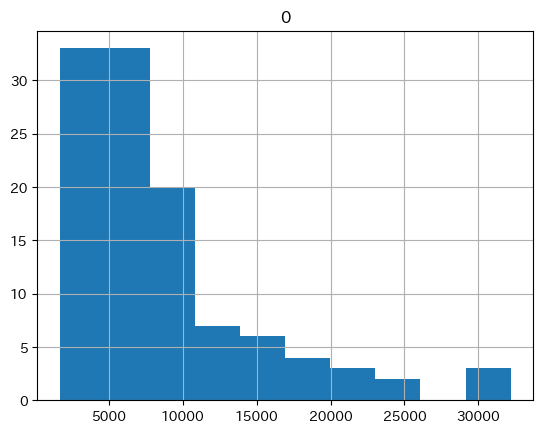

In [10]:
pd.DataFrame(f_3.exog_next['phi_i'] * f_3.exog_next['K_i']**(1-f_3.param['psi'])).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

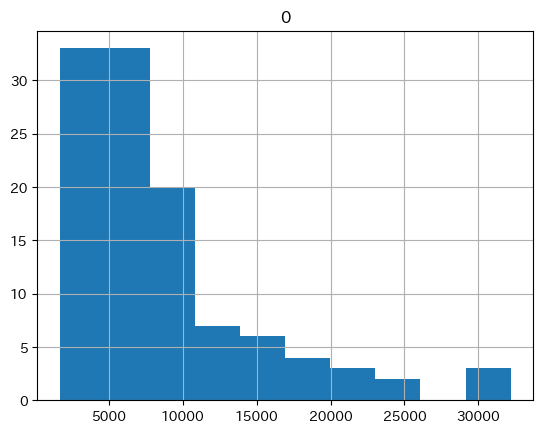

In [11]:
pd.DataFrame(f_2.ref_next['H_i']).hist()

子供の総数の実測値:  3326439.5474385065
子供の総数の推定値:  3335936.4920110307
実測値と推定値の差:  -9496.944572524168


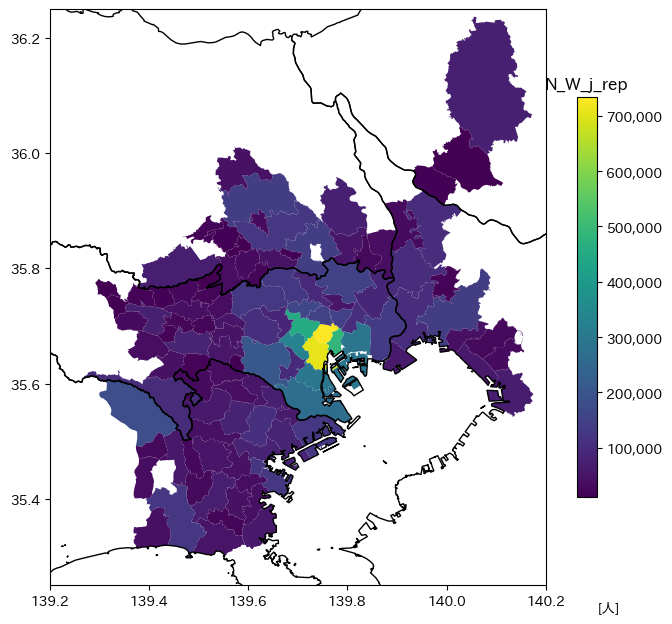

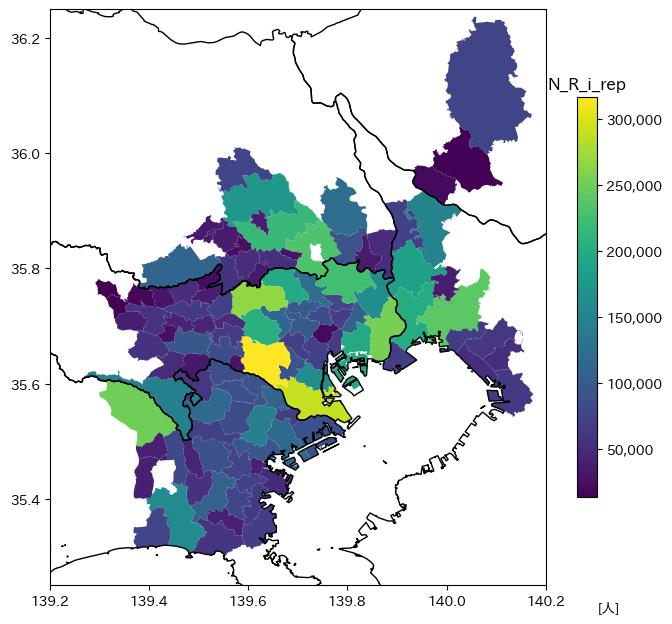

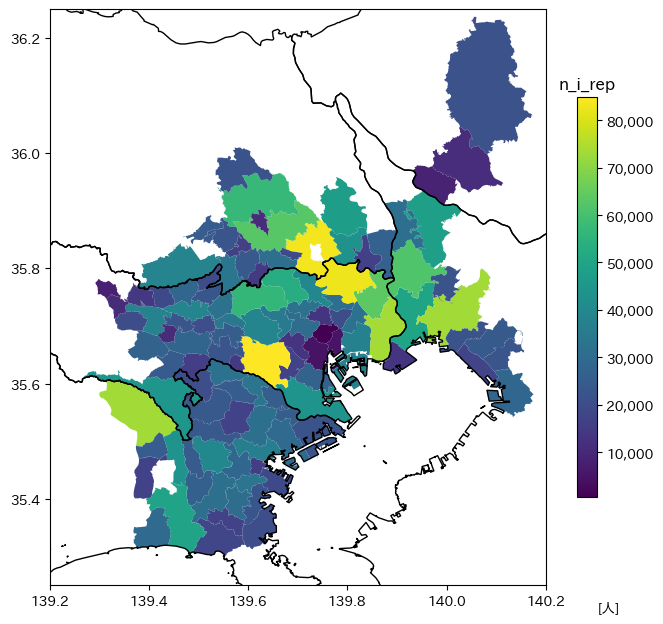

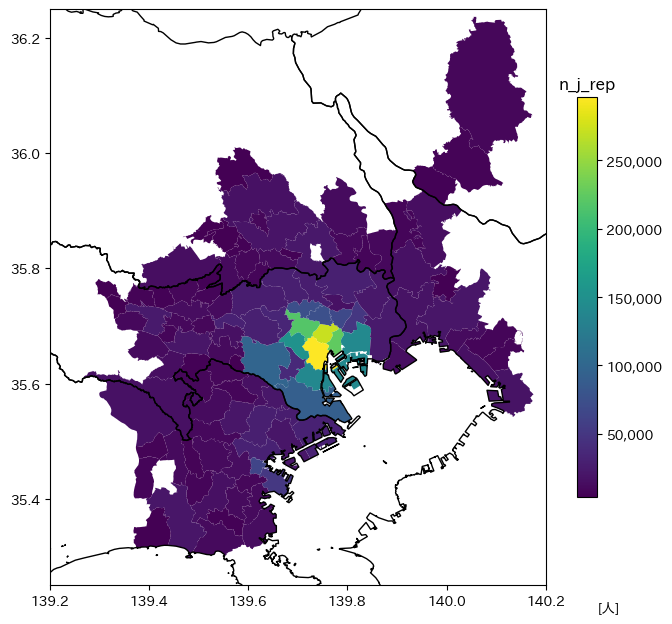

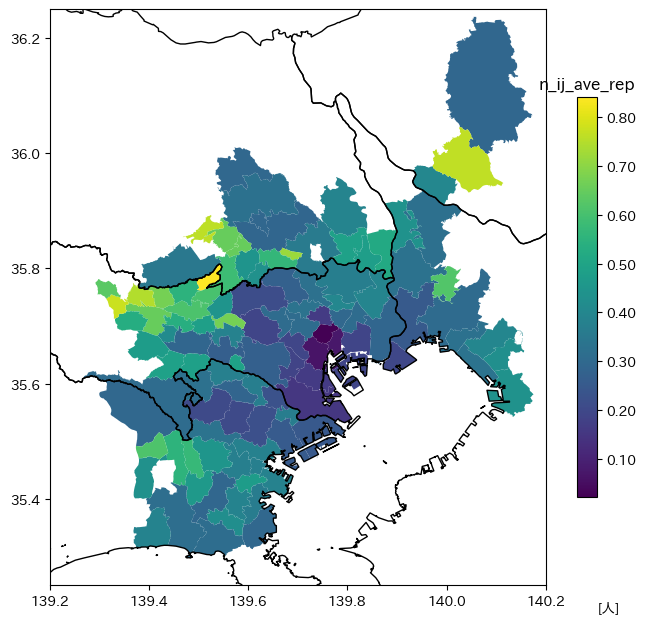

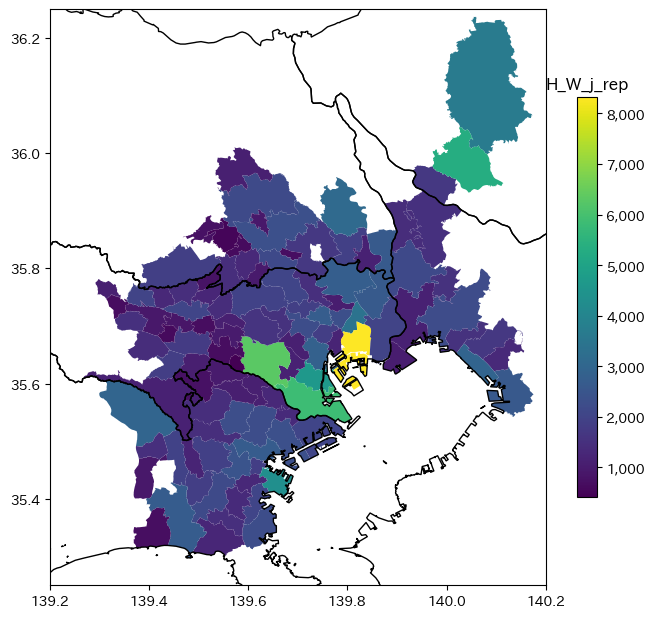

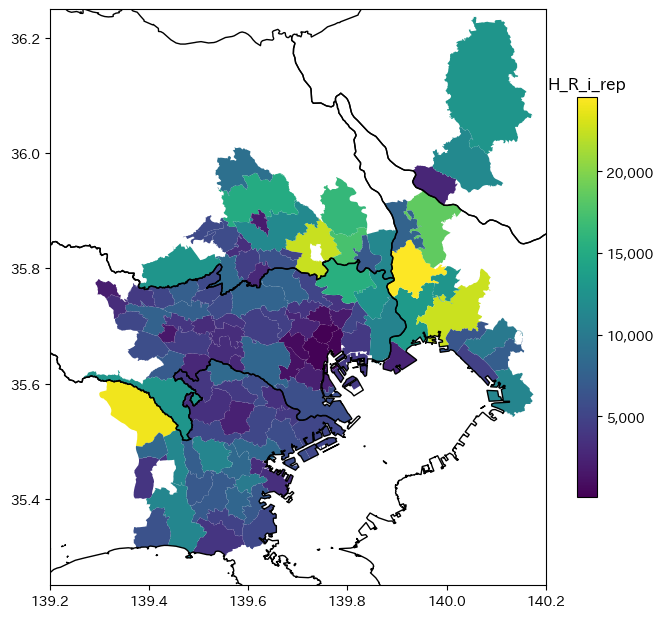

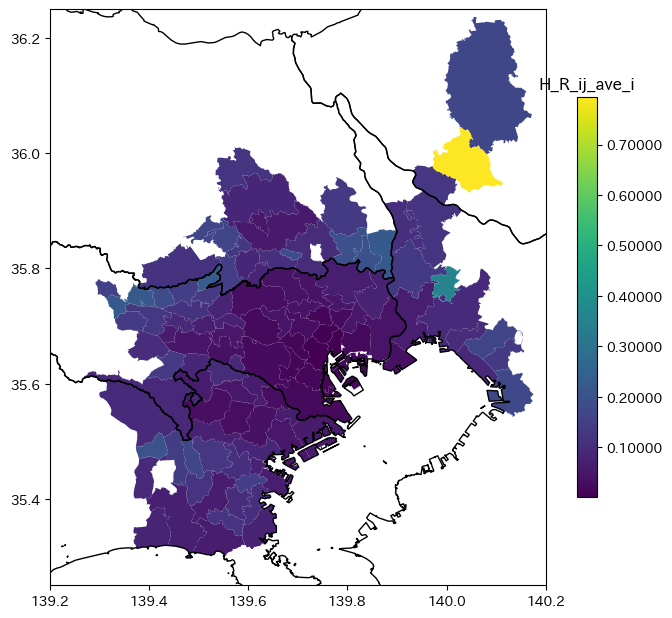

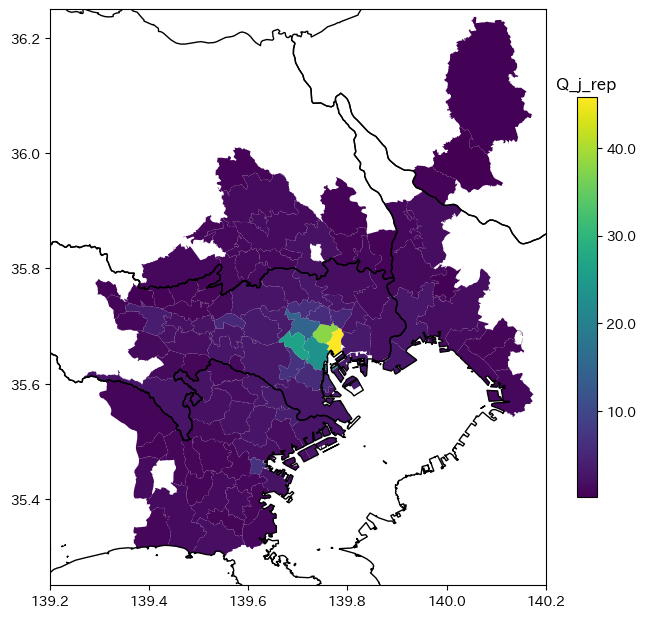

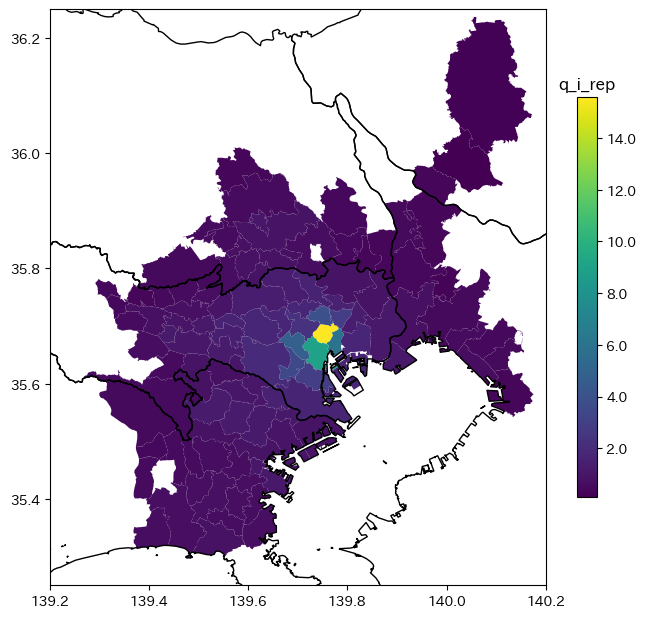

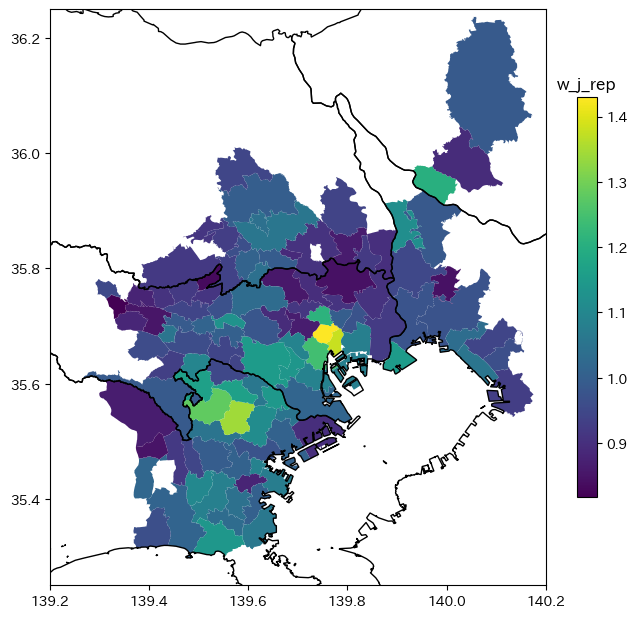

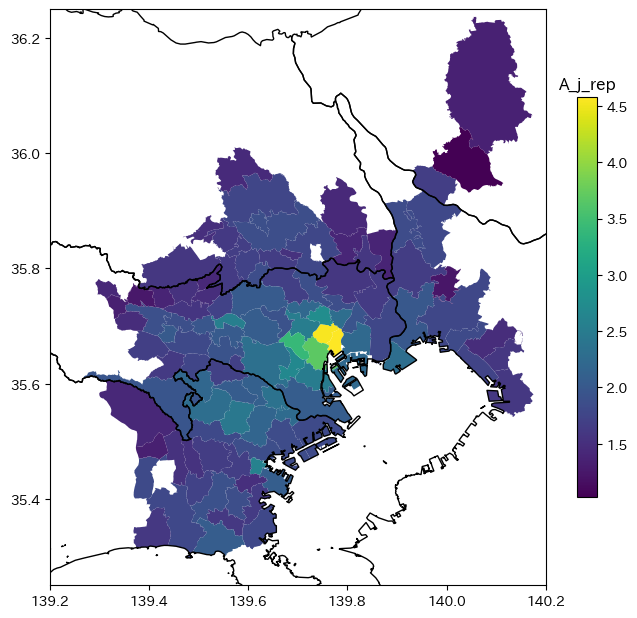

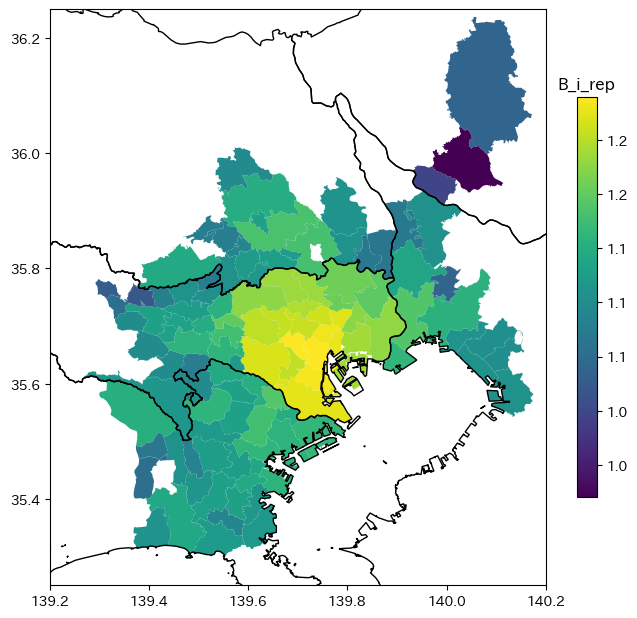

In [12]:
# f_3 replication
print('子供の総数の実測値: ', np.sum(f_3.ref_next['n_i']))
print('子供の総数の推定値: ', np.sum(f_3.exog_next['N']*f_3.rep['Pi_ij']*f_3.rep['n_ij']))
print('実測値と推定値の差: ', np.sum(f_3.ref_next['n_i'])-np.sum(f_3.exog_next['N']*f_3.rep['Pi_ij']*f_3.rep['n_ij']))
df_Pi_ij_rep = pd.DataFrame({
    'jcode': jcode,
    'n_i_rep': np.sum(f_3.exog_next['N']*f_3.rep['Pi_ij']*f_3.rep['n_ij'], axis=1),
    'n_j_rep': np.sum(f_3.exog_next['N']*f_3.rep['Pi_ij']*f_3.rep['n_ij'], axis=0),
    'H_R_ij_ave_i': np.sum(f_3.rep['H_R_ij']*f_3.exog_next['N']*f_3.rep['Pi_ij'], axis=1)/f_3.rep['N_R_i'],
    'n_ij_ave_rep': np.sum(f_3.exog_next['N']*f_3.rep['Pi_ij']*f_3.rep['n_ij'], axis=1)/f_3.rep['N_R_i'],
})
gdf_vis_rep = gdf.merge(pd.DataFrame({'jcode':jcode,'N_R_i_rep':f_3.rep['N_R_i']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'N_W_j_rep':f_3.rep['N_W_j']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'H_R_i_rep':f_3.rep['H_R_i']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'H_W_j_rep':f_3.rep['H_W_j']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'H_i_rep':f_3.rep['H_i']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'A_j_rep':f_3.rep['A_j']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'B_i_rep':f_3.rep['B_i']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'q_i_rep':f_3.rep['q_i']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'Q_j_rep':f_3.rep['Q_j']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'w_j_rep':f_3.rep['w_j']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'Ups_rep':f_3.rep['Ups_j']**f_3.param['lambda']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(pd.DataFrame({'jcode':jcode,'Omg_rep':f_3.rep['Omega_i']**f_3.param['rho']}), on='jcode', how='left')
gdf_vis_rep = gdf_vis_rep.merge(df_Pi_ij_rep, on='jcode', how='left')

plot_gdf(gdf_vis_rep, 'replication', 'N_W_j_rep', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_rep, 'replication', 'N_R_i_rep', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_rep, 'replication', 'n_i_rep', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_rep, 'replication', 'n_j_rep', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_rep, 'replication', 'n_ij_ave_rep', '[人]', '{x:,.2f}')
plot_gdf(gdf_vis_rep, 'replication', 'H_W_j_rep', '', '{x:,.0f}')
plot_gdf(gdf_vis_rep, 'replication', 'H_R_i_rep', '', '{x:,.0f}')
plot_gdf(gdf_vis_rep, 'replication', 'H_R_ij_ave_i', '', '{x:,.5f}')
plot_gdf(gdf_vis_rep, 'replication', 'Q_j_rep', '', '{x:,.1f}')
plot_gdf(gdf_vis_rep, 'replication', 'q_i_rep', '', '{x:,.1f}')
plot_gdf(gdf_vis_rep, 'replication', 'w_j_rep', '', '{x:,.1f}')
plot_gdf(gdf_vis_rep, 'replication', 'A_j_rep', '', '{x:,.1f}')
plot_gdf(gdf_vis_rep, 'replication', 'B_i_rep', '', '{x:,.1f}')

In [13]:
f_2.ref_next['N_R']

array([[5.44202916e-04, 2.68615891e-04, 5.47020242e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.62288104e-04, 1.10447417e-04, 2.09037973e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.64599423e-04, 1.04157139e-04, 1.98701450e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.61625495e-04, 1.07550224e-04, 1.28467077e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.13699898e-05, 5.99647200e-05, 6.75891366e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.34883968e-05, 6.52989504e-05, 7.85282632e-05]])

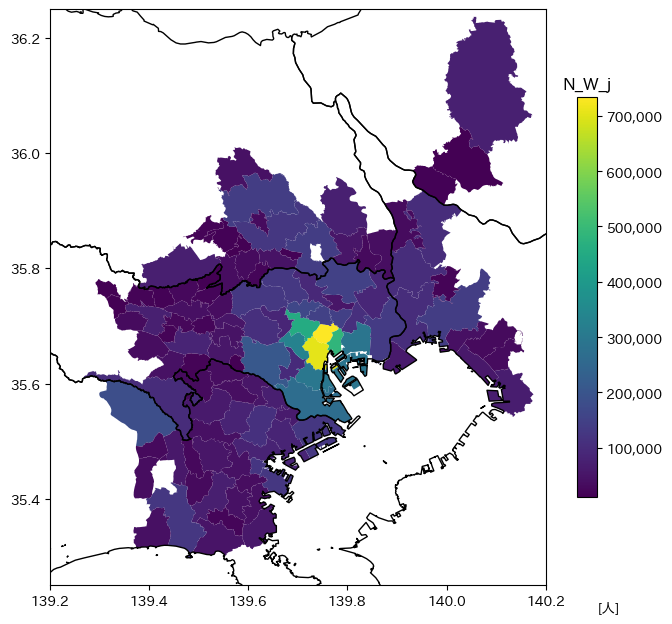

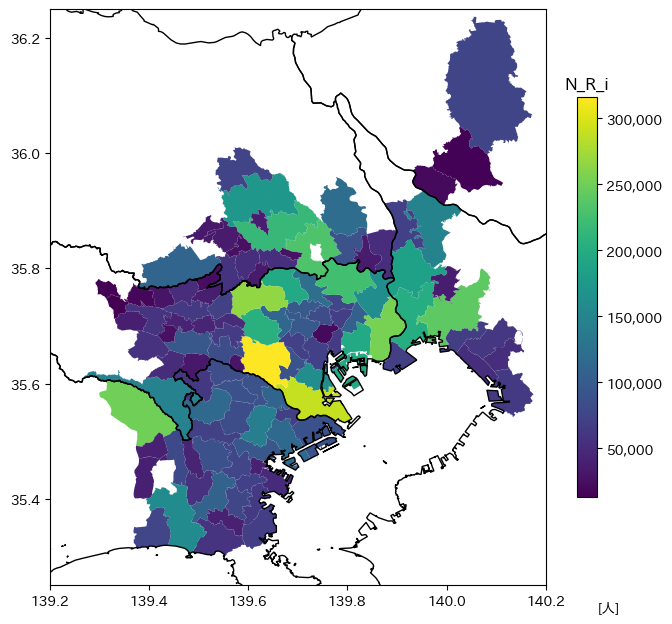

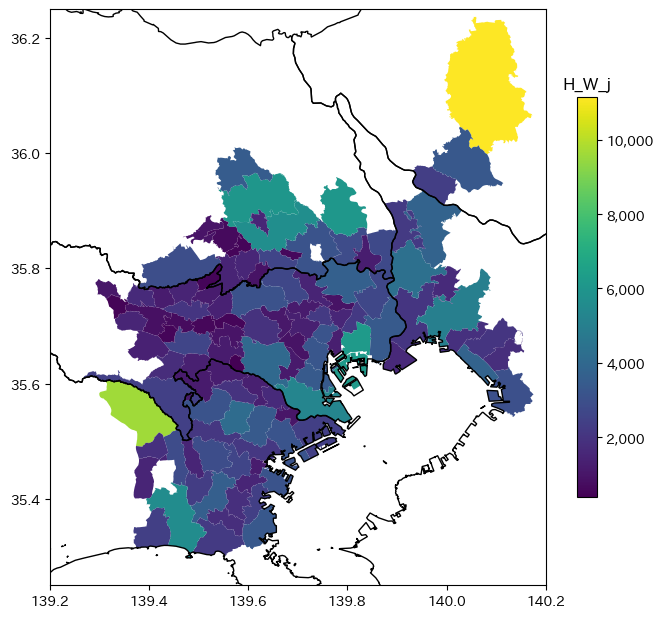

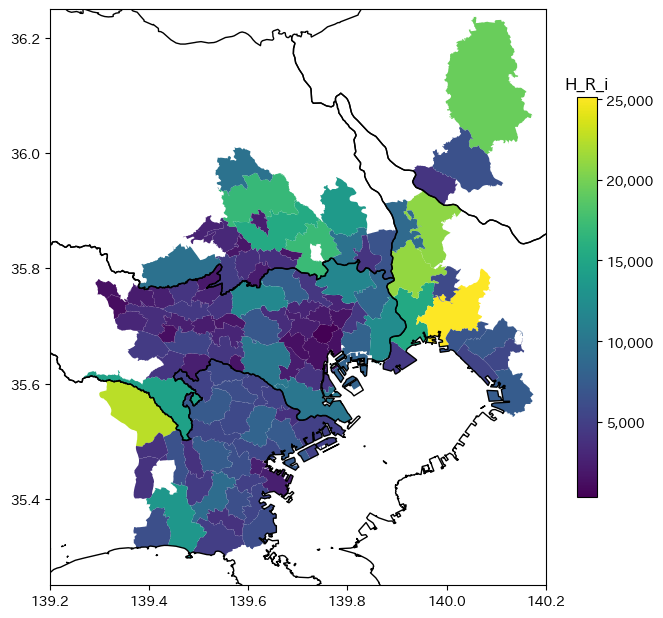

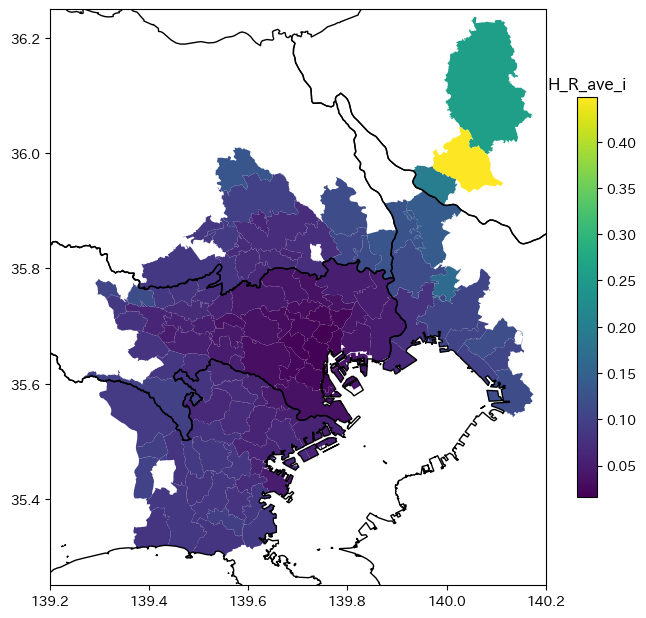

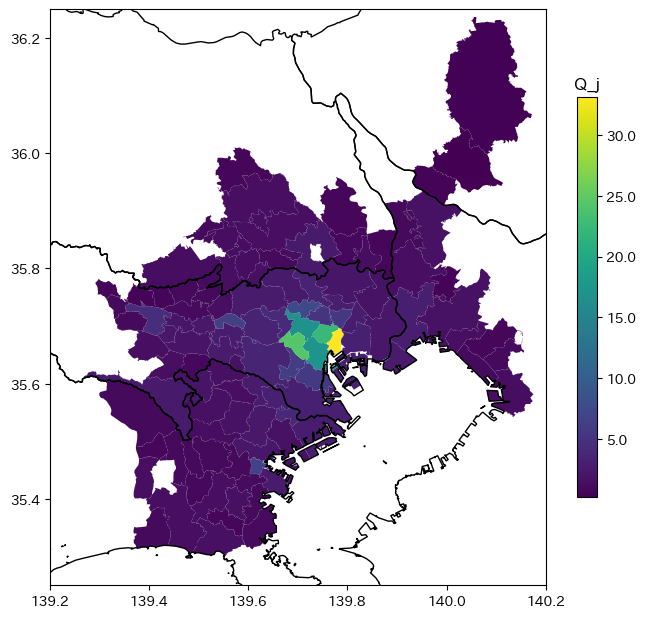

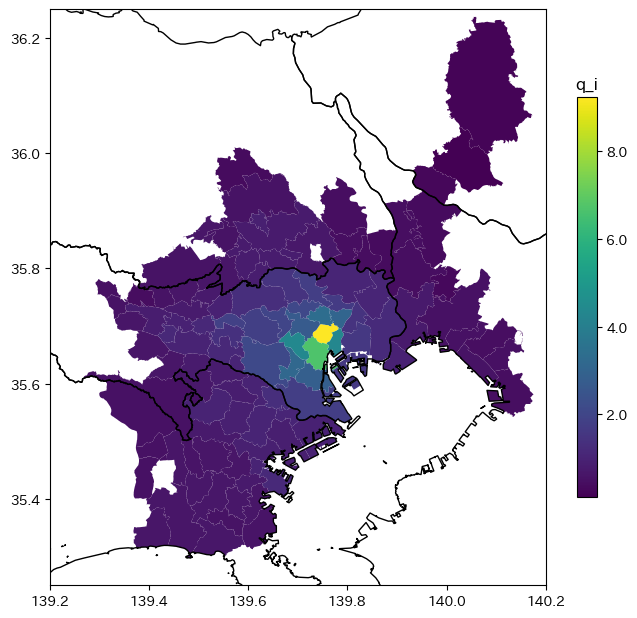

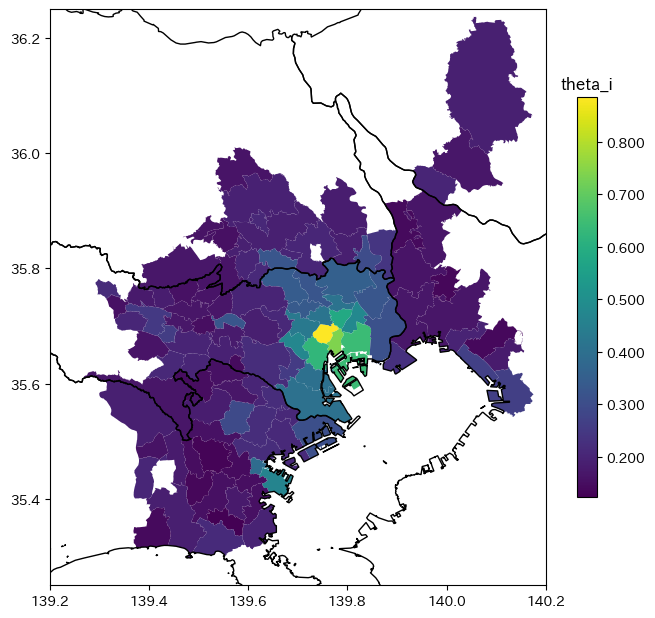

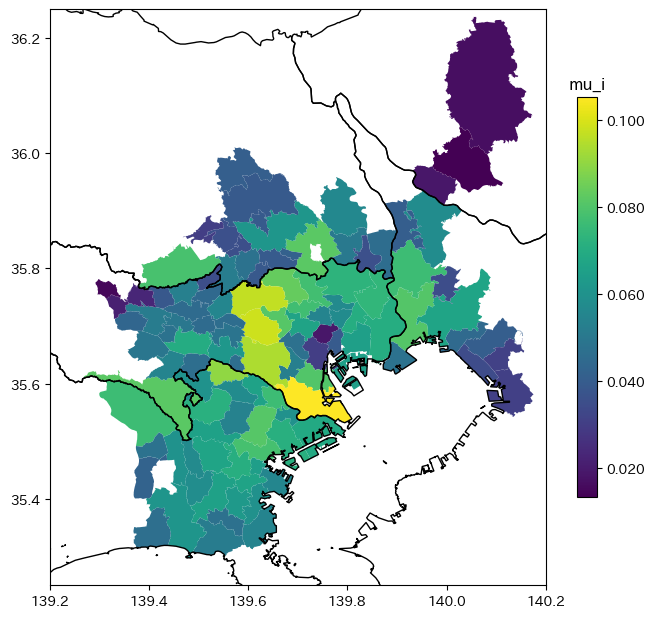

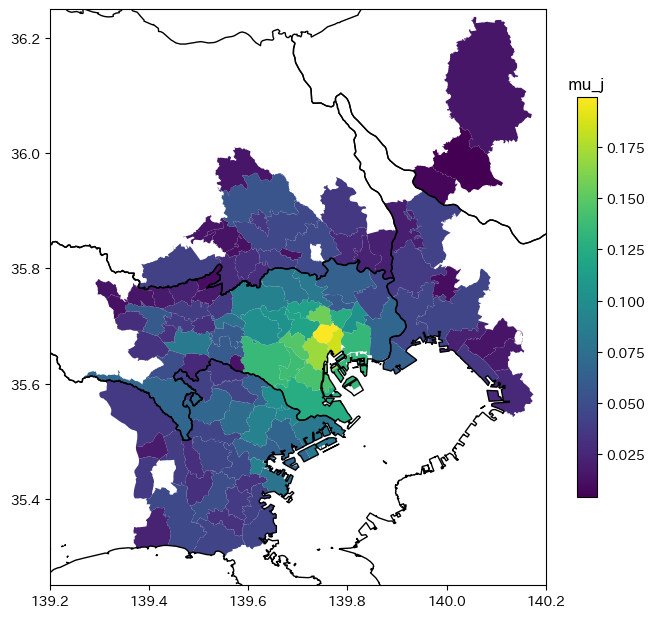

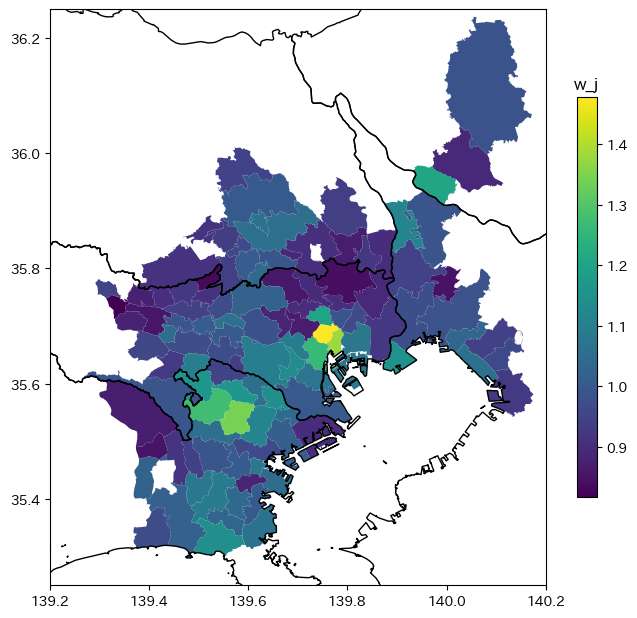

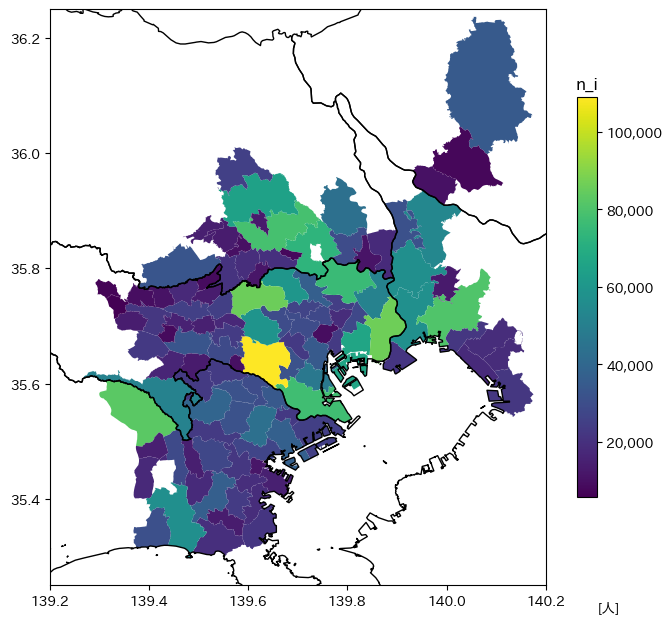

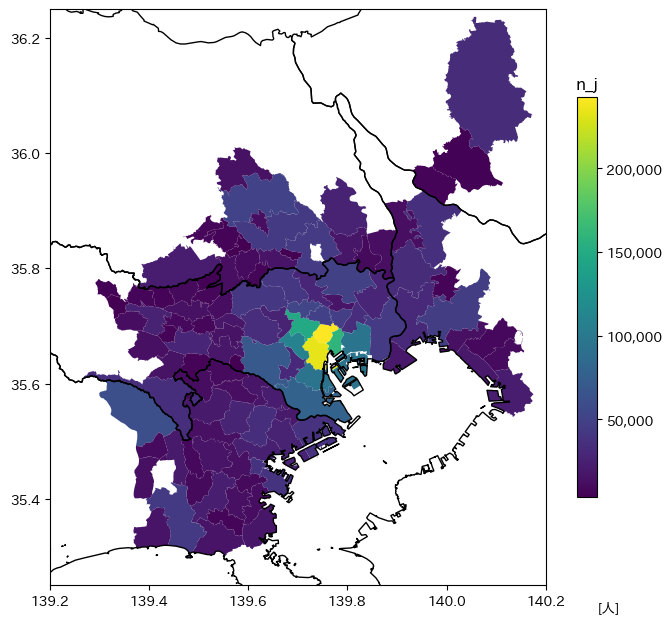

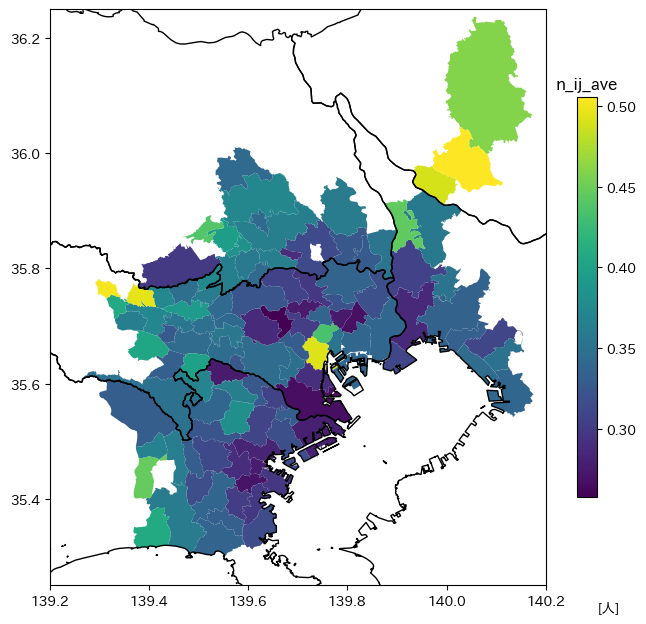

In [ ]:
# f_1 next
# data = f_1.exog_next['beta_chd_ij']
# data[data == 0] = np.nan
# beta_chd_ij = np.nanmean(data[:, 1:], axis=1)
df_Pi_ij_next = pd.DataFrame({
    'jcode': jcode,
    'N_R_i': np.sum(f_2.exog_next['N']*f_2.ref_next['Pi_est_ij']*f_2.ref_next['n_ij'], axis=1),
    'N_W_j': np.sum(f_2.exog_next['N']*f_2.ref_next['Pi_est_ij']*f_2.ref_next['n_ij'], axis=0),
    'n_i': np.sum(f_2.exog_next['N']*f_2.ref_next['Pi_est_ij']*f_2.ref_next['n_ij'], axis=1),
    'n_j': np.sum(f_2.exog_next['N']*f_2.ref_next['Pi_est_ij']*f_2.ref_next['n_ij'], axis=0),
    'mu_i': np.mean(f_2.ref_next['mu_ij'], axis=1),
    'mu_j': np.mean(f_2.ref_next['mu_ij'], axis=0),
    'n_ij_ave': np.sum(f_2.exog_next['N']*f_2.ref_next['Pi_est_ij']*f_2.ref_next['n_ij'], axis=1)/f_2.ref_next['N_R_i'],
})
gdf_vis_next = gdf.merge(pd.DataFrame({'jcode':jcode,'N_R_i':f_1.ref_next['N_R_i']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'N_W_j':f_1.ref_next['N_W_j']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'H_R_i':f_1.ref_next['H_R_i']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'H_R_ave_i':f_1.ref_next['H_R_i'] / f_1.ref_next['N_R_i']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'H_W_j':f_2.ref_next['H_W_j']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'q_i':f_1.ref_next['q_i']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'Q_j':f_1.ref_next['Q_j']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'theta_i':f_1.exog_next['theta_i']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(pd.DataFrame({'jcode':jcode,'w_j':f_1.ref_next['w_j']}), on='jcode', how='left')
gdf_vis_next = gdf_vis_next.merge(df_Pi_ij_next, on='jcode', how='left')


plot_gdf(gdf_vis_next, '2020', 'N_W_j', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_next, '2020', 'N_R_i', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_next, '2020', 'H_W_j', '', '{x:,.0f}')
plot_gdf(gdf_vis_next, '2020', 'H_R_i', '', '{x:,.0f}')
plot_gdf(gdf_vis_next, '2020', 'H_R_ave_i', '', '{x:,.2f}')
plot_gdf(gdf_vis_next, '2020', 'Q_j', '', '{x:,.1f}')
plot_gdf(gdf_vis_next, '2020', 'q_i', '', '{x:,.1f}')
plot_gdf(gdf_vis_next, '2020', 'theta_i', '', '{x:,.3f}')
plot_gdf(gdf_vis_next, '2020', 'mu_i', '', '{x:,.3f}')
plot_gdf(gdf_vis_next, '2020', 'mu_j', '', '{x:,.3f}')
# plot_gdf(gdf_vis_next, '2020', 'beta_chd_ij', '', '{x:,.3f}')
plot_gdf(gdf_vis_next, '2020', 'w_j', '', '{x:,.1f}')
plot_gdf(gdf_vis_next, '2020', 'n_i', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_next, '2020', 'n_j', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_next, '2020', 'n_ij_ave', '[人]', '{x:,.2f}')

子供の総数の実測値:  3126255.992428719
子供の総数の推定値:  3224350.864094016
実測値と推定値の差:  -98094.87166529708


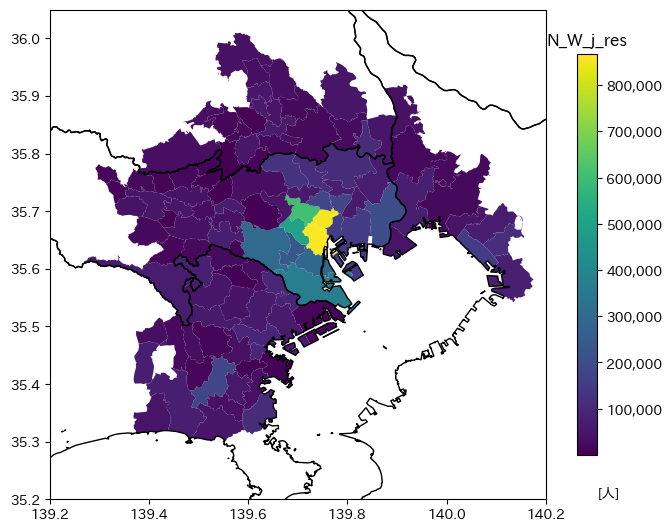

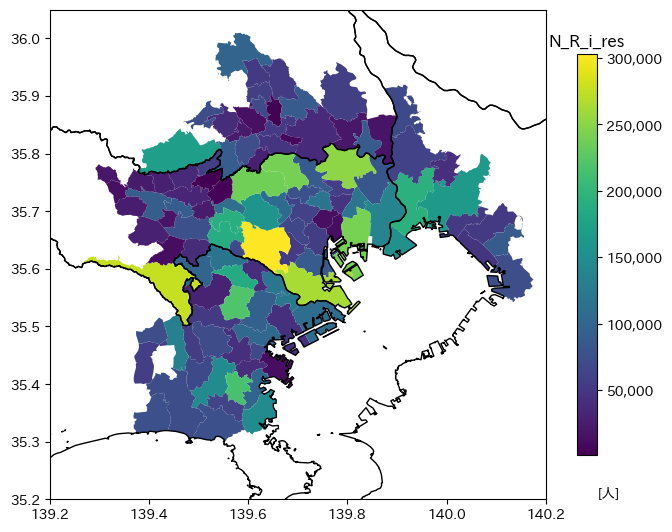

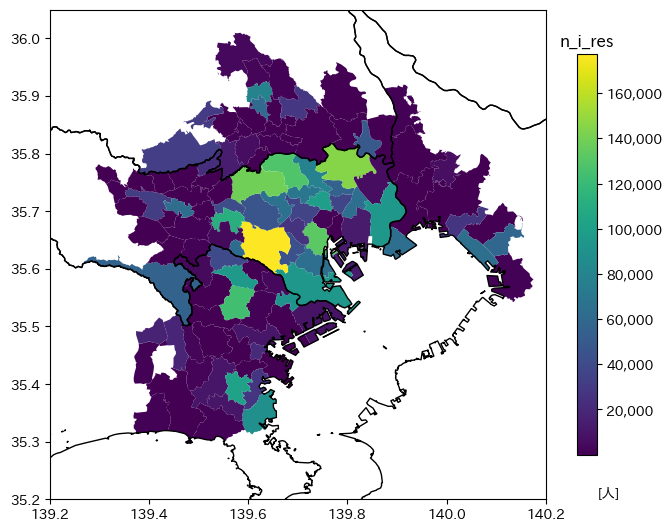

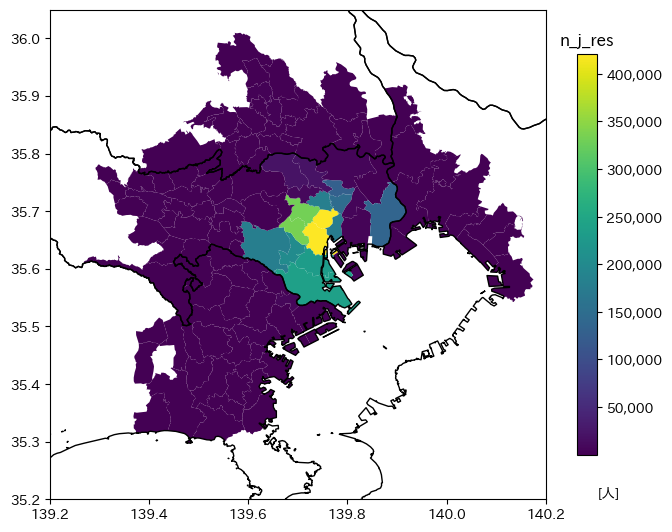

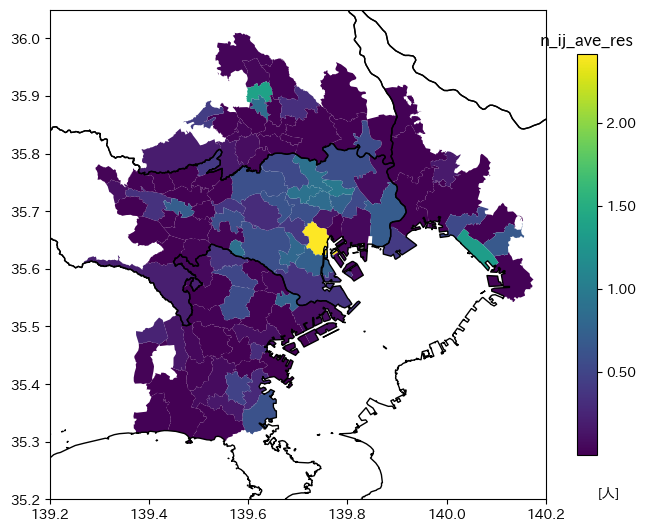

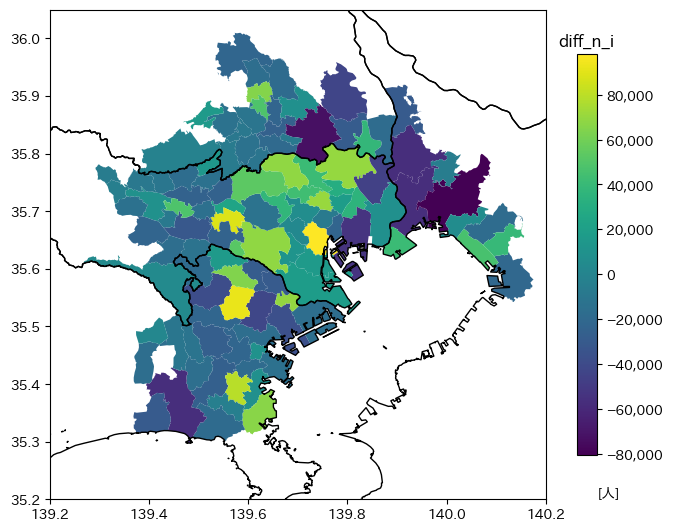

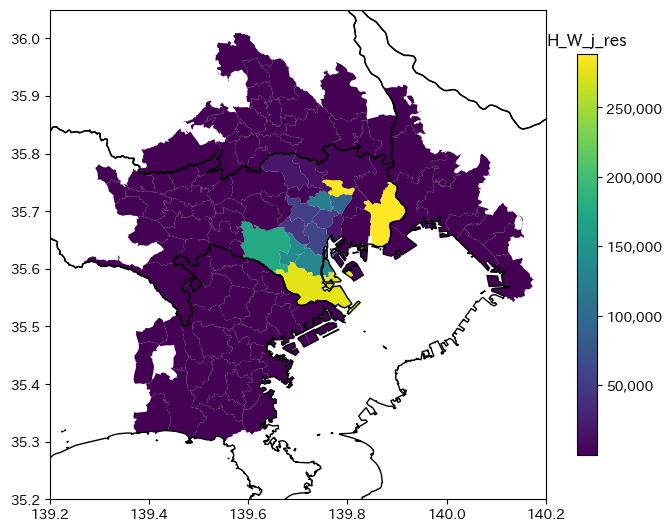

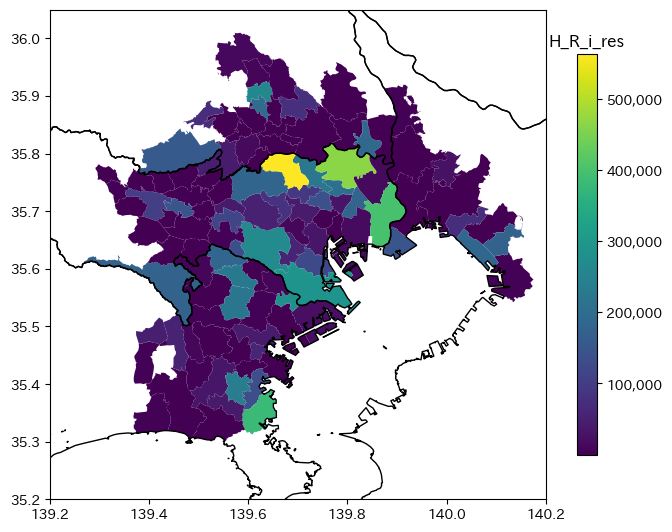

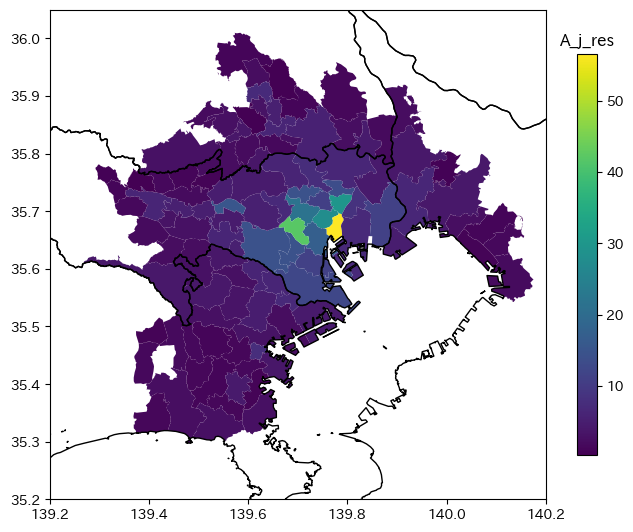

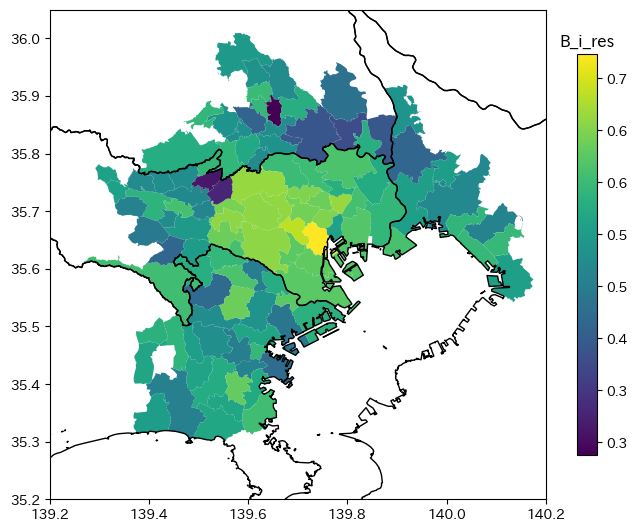

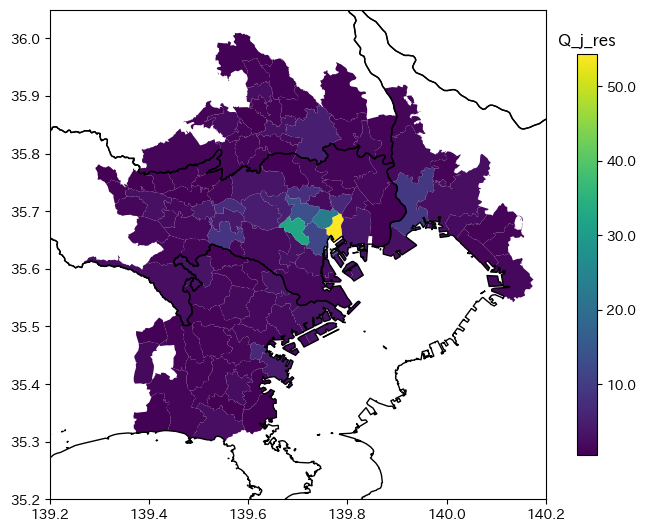

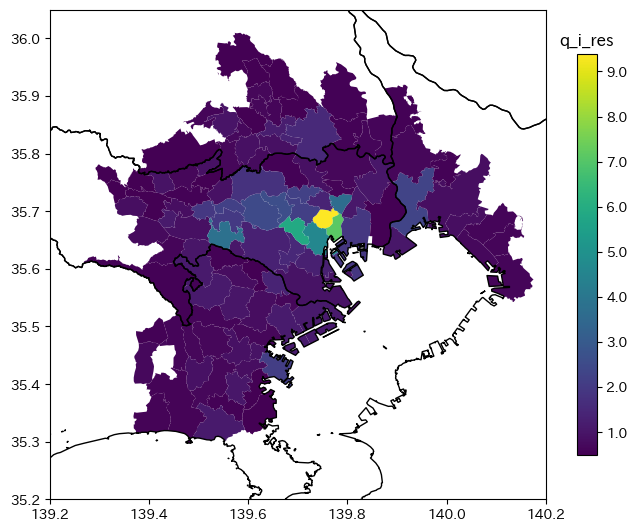

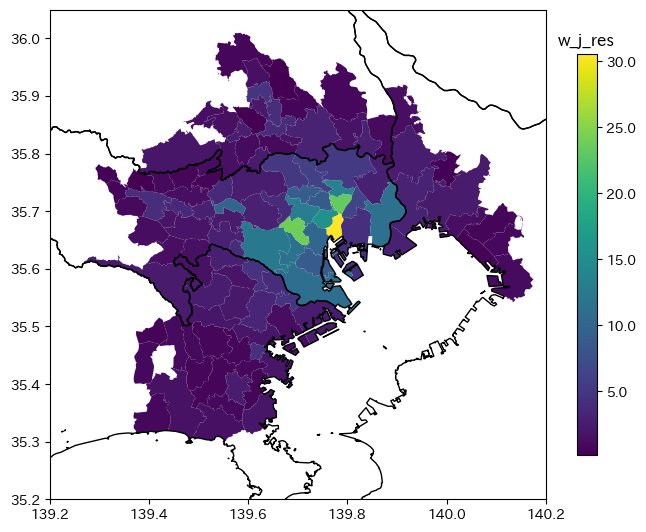

In [25]:
# f_3 simulation
print('子供の総数の実測値: ', np.sum(f_3.ref_next['n_i']))
print('子供の総数の推定値: ', np.sum(f_3.exog_next['N']*f_3.res['Pi_ij']*f_3.res['n_ij']))
print('実測値と推定値の差: ', np.sum(f_3.ref_next['n_i'])-np.sum(f_3.exog_next['N']*f_3.res['Pi_ij']*f_3.res['n_ij']))
df_Pi_ij_res = pd.DataFrame({
    'jcode': jcode,
    'n_i_res': np.sum(f_3.exog_next['N']*f_3.res['Pi_ij']*f_3.res['n_ij'], axis=1),
    'n_j_res': np.sum(f_3.exog_next['N']*f_3.res['Pi_ij']*f_3.res['n_ij'], axis=0),
    'n_ij_ave_res': np.sum(f_3.exog_next['N']*f_3.res['Pi_ij']*f_3.res['n_ij'], axis=1)/f_3.res['N_R_i'],
})
gdf_vis_res = gdf_vis.merge(pd.DataFrame({'jcode':jcode,'N_R_i_res':f_3.res['N_R_i']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'N_W_j_res':f_3.res['N_W_j']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'H_R_i_res':f_3.res['H_R_i']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'H_W_j_res':f_3.res['H_W_j']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'A_j_res':f_3.res['A_j']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'B_i_res':f_3.res['B_i']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'q_i_res':f_3.res['q_i']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'Q_j_res':f_3.res['Q_j']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'w_j_res':f_3.res['w_j']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'Ups_res':f_3.res['Ups_j']**f_3.param['lambda']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(pd.DataFrame({'jcode':jcode,'Omg_res':f_3.res['Omega_i']**f_3.param['rho']}), on='jcode', how='left')
gdf_vis_res = gdf_vis_res.merge(df_Pi_ij_res, on='jcode', how='left')

df_Pi_ij_next = pd.DataFrame({
    'jcode': jcode,
    'n_i': np.sum(f_1.exog_next['N']*f_1.ref_next['Pi_ij']*f_1.ref_next['n_ij'], axis=1),
    'n_j': np.sum(f_1.exog_next['N']*f_1.ref_next['Pi_ij']*f_1.ref_next['n_ij'], axis=0),
    'mu_i': np.mean(f_1.ref_next['mu_ij'], axis=1),
    'mu_j': np.mean(f_1.ref_next['mu_ij'], axis=0),
    'n_ij_ave': np.sum(f_3.exog_next['N']*f_3.ref_next['Pi_ij']*f_3.ref_next['n_ij'], axis=1)/f_3.ref_next['N_R_i'],
})

gdf_vis_next = gdf_vis.merge(df_Pi_ij_next, on='jcode', how='left')
gdf_vis_res['diff_n_i'] = gdf_vis_res['n_i_res'] - gdf_vis_next['n_i']

plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'N_W_j_res', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'N_R_i_res', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'n_i_res', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'n_j_res', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'n_ij_ave_res', '[人]', '{x:,.2f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'diff_n_i', '[人]', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'H_W_j_res', '', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'H_R_i_res', '', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'A_j_res', '', '{x:,.0f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'B_i_res', '', '{x:,.1f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'Q_j_res', '', '{x:,.1f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'q_i_res', '', '{x:,.1f}')
plot_gdf(gdf_vis_res, 'simulation_095_t_ij', 'w_j_res', '', '{x:,.1f}')